<a href="https://colab.research.google.com/github/znumunz/dataviz2025/blob/main/3_JENZY_is_perfect_project_Basicpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#กลุ่ม 3 JENZY_is_perfect
นางสาวกฤตยา นิกรกุล 663020277-7

นางสาวจิตรลดา นิมินรัมย์ 663020278-5

นางสาวบงกช เจตวัน 663020284-0

นายรุ่งแสง กองสุข 663020292-1

นางสาวศศิกานต์ ทิพย์สูงเนิน 663020297-1


# Looker studio
https://lookerstudio.google.com/reporting/3d37aa78-588e-4c66-b117-dfb3efb3da66

#Data
https://drive.google.com/drive/folders/1RxEmFbjofqkn2Z3cB4wZ6mAgKIZ80oJB

# Connect Google Drive

In [106]:
import os
from google.colab import drive
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/JENZY/Data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
import pandas as pd

# โหลด Data

##Stop_and_search

In [108]:
import os
import pandas as pd
# นำเข้า display เพื่อให้โค้ดทำงานได้สมบูรณ์ในสภาพแวดล้อมที่รองรับ (เช่น Jupyter/Colab)
from IPython.display import display

all_stop_and_search_dfs = []
file_type = 'stop-and-search' # กำหนดตัวแปรสำหรับประเภทไฟล์

for month in range(1, 6):  # Iterate from month 1 to 5
    month_str = f'2025-{month:02d}'  # Format month as 01, 02, etc.
    month_path = os.path.join(base_path, month_str)

    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if f'{file_type}.csv' in file: # ใช้ f-string เพื่อความยืดหยุ่น
                filepath = os.path.join(month_path, file)
                try:
                    df = pd.read_csv(filepath)

                    # Extract Police Force name from filename
                    file_suffix = f'-{file_type}.csv'
                    file_parts = file.replace(file_suffix, '').split('-')

                    # เปลี่ยนชื่อตัวแปรเป็น 'police_force' เพื่อความสม่ำเสมอ
                    police_force = '-'.join(file_parts[2:]).strip()

                    # **การปรับปรุง:** เปลี่ยนชื่อคอลัมน์จาก 'City' เป็น 'Police_Force'
                    df['Police_Force'] = police_force

                    # Add Month column with only the month number
                    df['Month'] = f'{month:02d}'

                    all_stop_and_search_dfs.append(df)

                except Exception as e:
                    print(f"Error reading file: {filepath} : {e}")
    else:
        print(f"Directory not found: {month_path}")

if all_stop_and_search_dfs:
    combined_stop_and_search_2025_all_months = pd.concat(all_stop_and_search_dfs, ignore_index=True)
    print(f"Combined DataFrame from 2025-01 to 2025-05 {file_type} files with 'Police_Force' and 'Month' columns:")
    print(f"Total rows in combined {file_type} data: {len(combined_stop_and_search_2025_all_months)}")
    display(combined_stop_and_search_2025_all_months.tail()) # ใช้ .head() แทน .tail() เพื่อแสดงผลตั้งแต่ต้น
else:
    print(f"No {file_type} files found in the specified directories.")

Combined DataFrame from 2025-01 to 2025-05 stop-and-search files with 'Police_Force' and 'Month' columns:
Total rows in combined stop-and-search data: 155291


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Police_Force,Month
155286,Person search,2025-05-31T02:33:00+00:00,NaN,NaN,51.852778,-4.306309,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,NaN,Controlled drugs,NaN,False,False,dyfed-powys,05
155287,Person search,2025-05-31T03:13:00+00:00,NaN,NaN,51.855427,-4.311048,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,NaN,NaN,NaN,False,False,dyfed-powys,05
155288,Person search,2025-05-31T03:13:00+00:00,NaN,NaN,51.855427,-4.311048,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,NaN,Offensive weapons,NaN,False,False,dyfed-powys,05
155289,Person and Vehicle search,2025-05-31T15:30:00+00:00,NaN,NaN,51.802278,-4.967404,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,NaN,NaN,Arrest,True,False,dyfed-powys,05
155290,Person search,2025-05-31T20:32:00+00:00,NaN,NaN,51.853386,-5.117979,Female,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,NaN,Offensive weapons,NaN,True,False,dyfed-powys,05


##Outcomes

combined_outcomes_2025_all_months

In [109]:
import os
import pandas as pd

# กำหนดเส้นทางหลักของข้อมูล
all_outcomes_dfs = []

# วนซ้ำตั้งแต่เดือน 1 (ม.ค.) ถึง 5 (พ.ค.)
for month in range(1, 6):
    month_str = f'2025-{month:02d}'
    month_path = os.path.join(base_path, month_str)

    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            # ตรวจสอบว่าไฟล์เป็น outcomes.csv หรือไม่
            if 'outcomes.csv' in file:
                filepath = os.path.join(month_path, file)
                try:
                    df = pd.read_csv(filepath)

                    # 1. สร้างคอลัมน์ Police_Force จากชื่อไฟล์
                    file_parts = file.replace('-outcomes.csv', '').split('-')
                    police_force = '-'.join(file_parts[2:]).strip()
                    df['Police_Force'] = police_force

                    # 2. สร้างคอลัมน์ Month (รูปแบบ 01, 02, ... 05)
                    df['Month'] = f'{month:02d}'

                    # 3. เพิ่ม DataFrame เข้าในรายการ
                    all_outcomes_dfs.append(df)

                except Exception as e:
                    print(f"Error reading file: {filepath} : {e}")
    else:
        print(f"Directory not found: {month_path}")

if all_outcomes_dfs:
    # 4. รวม DataFrame ทั้งหมด
    combined_outcomes_2025_all_months = pd.concat(all_outcomes_dfs, ignore_index=True)

    # 5. [ขั้นตอนสำคัญ] ลบแถวที่ซ้ำซ้อนกันทั้งหมด
    # (ใช้ทุกคอลัมน์เพื่อยืนยันว่าคดีซ้ำกันจริง)
    rows_before_drop = len(combined_outcomes_2025_all_months)
    combined_outcomes_2025_all_months.drop_duplicates(inplace=True)
    rows_after_drop = len(combined_outcomes_2025_all_months)

    print("Combined and Cleaned Outcomes Data:")
    print(f"Total rows before de-duplication: {rows_before_drop}")
    print(f"Total rows dropped due to duplication: {rows_before_drop - rows_after_drop}")
    print(f"Total rows in final combined outcomes data: {rows_after_drop}")
    display(combined_outcomes_2025_all_months.tail(5))
else:
    print("No outcomes files found in the specified directories.")

Combined and Cleaned Outcomes Data:
Total rows before de-duplication: 794203
Total rows dropped due to duplication: 35660
Total rows in final combined outcomes data: 758543


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force
794198,556b7983b7a8b71cc1f3b7bc3578539103fd0fc17347a8...,05,Suffolk Constabulary,Suffolk Constabulary,1.198680,52.050820,On or near Chaplains Gardens,E01029966,Ipswich 009D,Unable to prosecute suspect,suffolk
794199,ba4d5e5b9b9423f22f0bc1dab59ab4bebad54a657dc1d4...,05,Suffolk Constabulary,Suffolk Constabulary,1.318513,52.092376,On or near Doric Place,E01030211,East Suffolk 022D,Unable to prosecute suspect,suffolk
794200,ea4767117c9ce66fe45bad721a9c7ba34073f780163235...,05,Suffolk Constabulary,Suffolk Constabulary,1.483242,52.216987,On or near Saxon Road,E01030210,East Suffolk 018D,Unable to prosecute suspect,suffolk
794201,0f2d597755bae68bd9b9d36e2a2af04b2941510d87254a...,05,Suffolk Constabulary,Suffolk Constabulary,1.327349,52.100626,On or near Deben Meadows,E01030194,East Suffolk 020B,Action to be taken by another organisation,suffolk
794202,8a100dda3bd72723167cc2097200f4debd6c17fa40dd22...,05,Suffolk Constabulary,Suffolk Constabulary,0.731994,52.049756,On or near Hillcrest Road,E01029916,Babergh 007E,Unable to prosecute suspect,suffolk


##Street

In [110]:
import os
import pandas as pd
from IPython.display import display # Import display for use with .tail()

# --- Configuration ---
# base_path = '/content/drive/MyDrive/Python&DataViz2025/Data'
file_type = 'street' # ตั้งชื่อประเภทไฟล์ที่เราต้องการรวม

# --- Data Collection ---
all_dfs = [] # ใช้ตัวแปรกลางที่ชื่อ 'all_dfs' แทน all_outcomes_dfs

for month in range(1, 6):  # Iterate from month 1 to 5
    month_str = f'2025-{month:02d}'
    month_path = os.path.join(base_path, month_str)

    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            # ตรวจสอบชื่อไฟล์ให้ตรงกับประเภทที่เราต้องการ (เช่น 'street.csv')
            if f'{file_type}.csv' in file:
                filepath = os.path.join(month_path, file)

                # *** ข้อผิดพลาดหลักถูกแก้ตรงนี้: ย้าย try/except เข้ามาในลูปไฟล์ ***
                try:
                    df = pd.read_csv(filepath)

                    # 1. Extract Police Force Name (แทนที่ -street.csv ด้วยค่าที่ถูกต้อง)
                    # Example filename: 2025-01-avon-and-somerset-street.csv
                    # คำสั่ง .replace ต้องเปลี่ยนตามประเภทไฟล์

                    # คำนวณส่วนของชื่อไฟล์ที่จะลบออก: '-street.csv'
                    file_suffix = f'-{file_type}.csv'

                    # การดึงชื่อ Police_Force:
                    file_parts = file.replace(file_suffix, '').split('-')
                    # ชื่อกองกำลังจะเริ่มตั้งแต่ Index 2 เป็นต้นไป (2025, 01, avon-and-somerset)
                    police_force = '-'.join(file_parts[2:]).strip()
                    df['Police_Force'] = police_force

                    # 2. Add Month column (as 01, 02, etc.)
                    df['Month'] = f'{month:02d}'

                    # 3. Append the DataFrame (ไม่ซ้ำซ้อน)
                    all_dfs.append(df)

                except Exception as e:
                    print(f"Error reading file: {filepath} : {e}")
    else:
        print(f"Directory not found: {month_path}")

# --- Final Combination ---
if all_dfs:
    # เปลี่ยนชื่อตัวแปรผลลัพธ์ให้ตรงกับประเภทไฟล์ (street)
    combined_street_2025_all_months = pd.concat(all_dfs, ignore_index=True)
    print(f"Combined DataFrame from 2025-01 to 2025-05 {file_type} files with 'Police_Force' and 'Month' columns:")
    print(f"Total rows in combined {file_type} data: {len(combined_street_2025_all_months)}")
    display(combined_street_2025_all_months.tail(5))
else:
    print(f"No {file_type} files found in the specified directories.")

Combined DataFrame from 2025-01 to 2025-05 street files with 'Police_Force' and 'Month' columns:
Total rows in combined street data: 684676


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Police_Force
684671,76065c27a031c6109da24d90c643089bbb923bbb66b6a4...,05,Warwickshire Police,Warwickshire Police,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences,Under investigation,NaN,warwickshire
684672,2946882fd1dfa164598337f6754d5056de2fda59ae61db...,05,Warwickshire Police,Warwickshire Police,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences,Under investigation,NaN,warwickshire
684673,2b2ca2515042b77218ceca1262c6c778c49719f988ecab...,05,Warwickshire Police,Warwickshire Police,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences,Under investigation,NaN,warwickshire
684674,27505aaece44305b26d6c4a5414ec397acf31013463714...,05,Warwickshire Police,Warwickshire Police,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences,Awaiting court outcome,NaN,warwickshire
684675,9e9f9300dea21111db17f31dafeb2f70ed6f28ce6bef4b...,05,Warwickshire Police,Warwickshire Police,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences,Under investigation,NaN,warwickshire


# Clean Data

##Stop and search

### remove duplicate

In [111]:
   combined_stop_and_search_2025_all_months = combined_stop_and_search_2025_all_months.drop_duplicates()

###ลบ column  'Policing operation'

In [112]:
# ลบ column  'Policing operation'
combined_stop_and_search_2025_all_months = combined_stop_and_search_2025_all_months.drop(columns=['Policing operation'])
combined_stop_and_search_2025_all_months.head()

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Police_Force,Month
0,Person search,2025-01-01T00:05:00+00:00,NaN,51.062267,-1.311082,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,Community resolution,True,False,hampshire,01
1,Person search,2025-01-01T00:17:00+00:00,NaN,51.242541,-0.753933,Male,25-34,Other ethnic group - Any other ethnic group,Asian,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,False,False,hampshire,01
2,Person search,2025-01-01T00:17:00+00:00,NaN,51.242541,-0.753933,Female,25-34,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,False,False,hampshire,01
3,Person search,2025-01-01T00:18:00+00:00,NaN,51.240856,-0.757030,Male,10-17,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,False,False,hampshire,01
4,Person search,2025-01-01T00:18:00+00:00,NaN,51.242541,-0.753933,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,False,False,hampshire,01


### เติมคำ 'Unknown' ในค่าว่าง

In [113]:
# เติมคำ 'Unknown' ในค่าว่าง
columns_to_fill_unknown = [
    'Part of a policing operation',
    'Gender',
    'Self-defined ethnicity',
    'Officer-defined ethnicity',
    'Legislation',
    'Object of search',
    'Outcome linked to object of search',
    'Removal of more than just outer clothing'
]
combined_stop_and_search_2025_all_months[columns_to_fill_unknown] = combined_stop_and_search_2025_all_months[columns_to_fill_unknown].fillna('Unknown')
combined_stop_and_search_2025_all_months.head()

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Police_Force,Month
0,Person search,2025-01-01T00:05:00+00:00,Unknown,51.062267,-1.311082,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Unknown,Community resolution,True,False,hampshire,01
1,Person search,2025-01-01T00:17:00+00:00,Unknown,51.242541,-0.753933,Male,25-34,Other ethnic group - Any other ethnic group,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01
2,Person search,2025-01-01T00:17:00+00:00,Unknown,51.242541,-0.753933,Female,25-34,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01
3,Person search,2025-01-01T00:18:00+00:00,Unknown,51.240856,-0.757030,Male,10-17,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01
4,Person search,2025-01-01T00:18:00+00:00,Unknown,51.242541,-0.753933,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01


### เติมคำ 'Not Recorded' ในค่าว่าง

In [114]:
combined_stop_and_search_2025_all_months['Outcome'] = combined_stop_and_search_2025_all_months['Outcome'].fillna('Not Recorded')
combined_stop_and_search_2025_all_months.head()

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Police_Force,Month
0,Person search,2025-01-01T00:05:00+00:00,Unknown,51.062267,-1.311082,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Unknown,Community resolution,True,False,hampshire,01
1,Person search,2025-01-01T00:17:00+00:00,Unknown,51.242541,-0.753933,Male,25-34,Other ethnic group - Any other ethnic group,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01
2,Person search,2025-01-01T00:17:00+00:00,Unknown,51.242541,-0.753933,Female,25-34,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01
3,Person search,2025-01-01T00:18:00+00:00,Unknown,51.240856,-0.757030,Male,10-17,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01
4,Person search,2025-01-01T00:18:00+00:00,Unknown,51.242541,-0.753933,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01


### เติมค่าว่างอายุ และจัดกลุ่มใหม่

In [115]:
# Function to calculate the average age from the age range string
import matplotlib.pyplot as plt
import numpy as np
import builtins
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

def calculate_average_age(age_range):
    if pd.isna(age_range):
        return np.nan
    if age_range == 'under 10':
        return 10  # Capped at 10
    elif age_range == 'over 34':
        return 34  # Capped at 34
    else:
        try:
            # Handle ranges like '10-17', '18-24', '25-34'
            lower, upper = map(int, age_range.split('-'))
            return (lower + upper) / 2
        except:
            return np.nan # Return NaN for any other unexpected formats

combined_stop_and_search_2025_all_months['Average_Age'] = combined_stop_and_search_2025_all_months['Age range'].apply(calculate_average_age)

num_rows = builtins.len(combined_stop_and_search_2025_all_months) # Use builtins.len
normal_data = np.random.normal(loc=1, scale=0.25, size=num_rows)

combined_stop_and_search_2025_all_months['Scaled_Age'] = combined_stop_and_search_2025_all_months['Average_Age'] * normal_data

mean_average_age = combined_stop_and_search_2025_all_months['Average_Age'].mean()

num_missing = combined_stop_and_search_2025_all_months['Scaled_Age'].isnull().sum()
imputation_noise = np.random.normal(loc=1, scale=0.6, size=num_missing)
imputation_values = mean_average_age * imputation_noise

missing_indices = combined_stop_and_search_2025_all_months[combined_stop_and_search_2025_all_months['Scaled_Age'].isnull()].index

combined_stop_and_search_2025_all_months.loc[missing_indices, 'Scaled_Age'] = imputation_values

# Replace scaled age values less than 10 with 10 and greater than 34 with 34
combined_stop_and_search_2025_all_months['Scaled_Age'] = combined_stop_and_search_2025_all_months['Scaled_Age'].apply(lambda x: x*(-1) if x < 0 else x)


combined_stop_and_search_2025_all_months.drop(columns = ['Average_Age','Age range'] , inplace  = True)

age_bins = [0, 10, 18, 25, 35, 100] # Adjusted bins to include 0 and a higher upper bound
age_labels = ['under 10', '10-17', '18-24', '25-34', 'over 34']

combined_stop_and_search_2025_all_months['Age_Range'] = pd.cut(
    combined_stop_and_search_2025_all_months['Scaled_Age'],
    bins=age_bins,
    labels=age_labels,
    right=False # Use right=False to include the lower bound in the bin
)

combined_stop_and_search_2025_all_months.head()

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Police_Force,Month,Scaled_Age,Age_Range
0,Person search,2025-01-01T00:05:00+00:00,Unknown,51.062267,-1.311082,Male,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Unknown,Community resolution,True,False,hampshire,01,23.607749,18-24
1,Person search,2025-01-01T00:17:00+00:00,Unknown,51.242541,-0.753933,Male,Other ethnic group - Any other ethnic group,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,28.480301,25-34
2,Person search,2025-01-01T00:17:00+00:00,Unknown,51.242541,-0.753933,Female,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,34.276703,25-34
3,Person search,2025-01-01T00:18:00+00:00,Unknown,51.240856,-0.757030,Male,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,18.640226,18-24
4,Person search,2025-01-01T00:18:00+00:00,Unknown,51.242541,-0.753933,Male,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,19.770695,18-24


<Axes: ylabel='Frequency'>

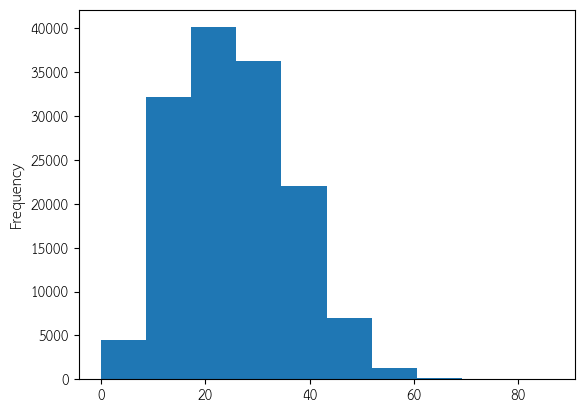

In [116]:
combined_stop_and_search_2025_all_months['Scaled_Age'].plot(kind = 'hist')

### เติมค่าว่างใน Longitude และ Latitude โดยใช้ค่ามัธยฐานของ Police_Force

In [117]:
# Group by Police_Force and check if all Latitude and Longitude values are null in each group
police_force_all_null_coords = combined_stop_and_search_2025_all_months.groupby('Police_Force')[['Latitude', 'Longitude']].apply(
    lambda x: x.isnull().all()
)

# Filter for police forces where both Latitude and Longitude are entirely null
police_forces_with_all_null_coords = police_force_all_null_coords[
    (police_force_all_null_coords['Latitude'] == True) & (police_force_all_null_coords['Longitude'] == True)
].index.tolist()

if police_forces_with_all_null_coords:
    print("Police Forces with all Latitude and Longitude values missing:")
    for police_force in police_forces_with_all_null_coords:
        print(police_force)
else:
    print("No Police Forces found where all Latitude and Longitude values are missing.")

Police Forces with all Latitude and Longitude values missing:
south-yorkshire
warwickshire


###สร้างคอลัมน์เพื่อดูว่าแถวไหนถูกเติมค่า lat long

In [118]:
# สร้างคอลัมน์ Flag เพื่อติดตามการเปลี่ยนแปลง
combined_stop_and_search_2025_all_months['Is_LonLat_Imputed'] = combined_stop_and_search_2025_all_months['Longitude'].isnull()

# คำนวณค่ามัธยฐานของ Longitude และ Latitude สำหรับ Police_Force แต่ละแห่ง
# โดยกรองเฉพาะกลุ่มที่มีค่าพิกัดที่ไม่เป็นค่าว่างอย่างน้อยหนึ่งค่า
police_force_coords_median = combined_stop_and_search_2025_all_months.groupby('Police_Force')[['Longitude', 'Latitude']].median()
# ดึงเฉพาะ police forces ที่มีค่ามัธยฐานที่ไม่ใช่ NaN (นั่นคือ มีข้อมูลพิกัดอย่างน้อย 1 แถว)
police_force_coords_median = police_force_coords_median.dropna()


# 1. เติมค่าว่างใน Longitude โดยใช้ค่ามัธยฐานของ Police_Force
combined_stop_and_search_2025_all_months['Longitude'] = combined_stop_and_search_2025_all_months.apply(
    lambda row: police_force_coords_median.loc[row['Police_Force'], 'Longitude']
    if pd.isna(row['Longitude']) and row['Police_Force'] in police_force_coords_median.index
    else row['Longitude'],
    axis=1
)

# 2. เติมค่าว่างใน Latitude โดยใช้ค่ามัธยฐานของ Police_Force
combined_stop_and_search_2025_all_months['Latitude'] = combined_stop_and_search_2025_all_months.apply(
    lambda row: police_force_coords_median.loc[row['Police_Force'], 'Latitude']
    if pd.isna(row['Latitude']) and row['Police_Force'] in police_force_coords_median.index
    else row['Latitude'],
    axis=1
)

# คำนวณค่ามัธยฐานโดยรวมของ Longitude และ Latitude จากทั้ง DataFrame
overall_median_longitude = combined_stop_and_search_2025_all_months['Longitude'].median()
overall_median_latitude = combined_stop_and_search_2025_all_months['Latitude'].median()

# 3. เติมค่าว่างที่เหลือด้วยค่ามัธยฐานโดยรวม (Fallback Imputation)
combined_stop_and_search_2025_all_months['Longitude'] = combined_stop_and_search_2025_all_months['Longitude'].fillna(overall_median_longitude)
combined_stop_and_search_2025_all_months['Latitude'] = combined_stop_and_search_2025_all_months['Latitude'].fillna(overall_median_latitude)
combined_stop_and_search_2025_all_months.head()


,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Police_Force,Month,Scaled_Age,Age_Range,Is_LonLat_Imputed
0,Person search,2025-01-01T00:05:00+00:00,Unknown,51.062267,-1.311082,Male,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Unknown,Community resolution,True,False,hampshire,01,23.607749,18-24,False
1,Person search,2025-01-01T00:17:00+00:00,Unknown,51.242541,-0.753933,Male,Other ethnic group - Any other ethnic group,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,28.480301,25-34,False
2,Person search,2025-01-01T00:17:00+00:00,Unknown,51.242541,-0.753933,Female,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,34.276703,25-34,False
3,Person search,2025-01-01T00:18:00+00:00,Unknown,51.240856,-0.757030,Male,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,18.640226,18-24,False
4,Person search,2025-01-01T00:18:00+00:00,Unknown,51.242541,-0.753933,Male,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,19.770695,18-24,False


In [121]:
print("Missing values after handling Latitude and Longitude:")
display(combined_stop_and_search_2025_all_months.isnull().sum())

Missing values after handling Latitude and Longitude:


,0
Type,0
Date,0
Part of a policing operation,0
Latitude,0
Longitude,0
Gender,0
Self-defined ethnicity,0
Officer-defined ethnicity,0
Legislation,0
Object of search,0


In [122]:
combined_stop_and_search_2025_all_months.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143551 entries, 0 to 155290
Data columns (total 18 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   Type                                      143551 non-null  object  
 1   Date                                      143551 non-null  object  
 2   Part of a policing operation              143551 non-null  object  
 3   Latitude                                  143551 non-null  float64 
 4   Longitude                                 143551 non-null  float64 
 5   Gender                                    143551 non-null  object  
 6   Self-defined ethnicity                    143551 non-null  object  
 7   Officer-defined ethnicity                 143551 non-null  object  
 8   Legislation                               143551 non-null  object  
 9   Object of search                          143551 non-null  object  
 10  Outcome      

In [123]:
display(combined_stop_and_search_2025_all_months.head())

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Police_Force,Month,Scaled_Age,Age_Range,Is_LonLat_Imputed
0,Person search,2025-01-01T00:05:00+00:00,Unknown,51.062267,-1.311082,Male,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Unknown,Community resolution,True,False,hampshire,01,23.607749,18-24,False
1,Person search,2025-01-01T00:17:00+00:00,Unknown,51.242541,-0.753933,Male,Other ethnic group - Any other ethnic group,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,28.480301,25-34,False
2,Person search,2025-01-01T00:17:00+00:00,Unknown,51.242541,-0.753933,Female,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,34.276703,25-34,False
3,Person search,2025-01-01T00:18:00+00:00,Unknown,51.240856,-0.757030,Male,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,18.640226,18-24,False
4,Person search,2025-01-01T00:18:00+00:00,Unknown,51.242541,-0.753933,Male,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,19.770695,18-24,False


## Outcomes

In [124]:
combined_outcomes_2025_all_months.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,11315
Latitude,11315
Location,0
LSOA code,11317
LSOA name,11317
Outcome type,0


### 1. เติม Dummy - LSOA Missing

In [125]:
# แทนที่ค่าว่างใน LSOA ด้วยข้อความระบุว่าข้อมูลขาดหายไป
imputation_value = 'LSOA Missing'

combined_outcomes_2025_all_months['LSOA code'].fillna(imputation_value, inplace=True)
combined_outcomes_2025_all_months['LSOA name'].fillna(imputation_value, inplace=True)

/tmp/ipython-input-287462184.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-287462184.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [126]:
combined_outcomes_2025_all_months.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,11315
Latitude,11315
Location,0
LSOA code,0
LSOA name,0
Outcome type,0


### สร้าง Column เพื่อระบุว่าแถวใดถูกเติมค่า

ถ้า Longitude เป็น NaN → ธงจะเป็น True (หมายความว่าแถวนี้จะถูกเติมค่าในขั้นตอนต่อไป)

ถ้า Longitude มีค่า → ธงจะเป็น False (หมายความว่าเป็นพิกัดจริง)

In [127]:
# 2. สร้าง Flag Column เพื่อระบุว่าแถวใดถูกเติมค่า
combined_outcomes_2025_all_months['Is_LonLat_Imputed'] = combined_outcomes_2025_all_months['Longitude'].isnull()
combined_outcomes_2025_all_months.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed
0,36c74d0ef277fc0a1199c04a701c5a778079d7e1f39def...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.187811,51.703486,On or near Well Hill,E01022384,Stroud 010D,Investigation complete; no suspect identified,gloucestershire,False
1,76048dcfc086c0251da35b492a5312abe77ba9a4254316...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,NaN,NaN,No location,LSOA Missing,LSOA Missing,Unable to prosecute suspect,gloucestershire,True
2,d6a8e93f57127b6d424fb61b7cf263442e7c9ba3119eec...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,NaN,NaN,No location,LSOA Missing,LSOA Missing,Investigation complete; no suspect identified,gloucestershire,True
3,2df4827fcd024db83c38932b977dd1f430a86cc3b76c36...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,NaN,NaN,No location,LSOA Missing,LSOA Missing,Local resolution,gloucestershire,True
4,bacebcd65948542f6f6a2a292a8b8e8e6dd431f94a617c...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.080914,51.896367,On or near A4015,E01022126,Cheltenham 009F,Investigation complete; no suspect identified,gloucestershire,False


### คำนวณค่ามัธยฐานของ Longitude/Latitude สำหรับแต่ละ Police_Force

In [128]:
# 1. คำนวณค่ามัธยฐานของ Longitude/Latitude สำหรับแต่ละ Police_Force
force_coords_median = combined_outcomes_2025_all_months.groupby('Police_Force')[['Longitude', 'Latitude']].median()

# 2. เติมค่าว่างที่เหลือด้วยค่ามัธยฐานของ Police Force

combined_outcomes_2025_all_months['Longitude'].fillna(
    combined_outcomes_2025_all_months['Police_Force'].map(force_coords_median['Longitude']),
    inplace=True
)
combined_outcomes_2025_all_months['Latitude'].fillna(
    combined_outcomes_2025_all_months['Police_Force'].map(force_coords_median['Latitude']),
    inplace=True
)

/tmp/ipython-input-1767285028.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-1767285028.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or 

In [129]:
combined_outcomes_2025_all_months.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,0
Latitude,0
Location,0
LSOA code,0
LSOA name,0
Outcome type,0


###กรองเฉพาะแถวที่มี Crime ID ซ้ำ

In [130]:
# กรองเฉพาะแถวที่มี Crime ID ซ้ำ
duplicate_crime_rows = combined_outcomes_2025_all_months[combined_outcomes_2025_all_months['Crime ID'].duplicated(keep=False)].sort_values(by=['Crime ID', 'Month'])

# ตรวจสอบว่า Outcome type มีการเปลี่ยนแปลงสำหรับแต่ละ Crime ID ที่ซ้ำกันหรือไม่
# เราจะ Group by Crime ID และนับจำนวน Outcome type ที่ไม่ซ้ำกันในแต่ละกลุ่ม
outcome_change_check = duplicate_crime_rows.groupby('Crime ID')['Outcome type'].nunique().reset_index(name='Unique_Outcome_Types')

# กรองเฉพาะ Crime ID ที่มี Unique_Outcome_Types มากกว่า 1 (หมายถึง Outcome type เปลี่ยนแปลง)
crime_ids_with_outcome_change = outcome_change_check[outcome_change_check['Unique_Outcome_Types'] > 1]['Crime ID']

print(f"จำนวน Crime ID ที่ซ้ำกันในต่างเดือนและมี Outcome type เปลี่ยนแปลง: {len(crime_ids_with_outcome_change)}")

# หากต้องการดูตัวอย่าง Crime ID ที่ Outcome type เปลี่ยนแปลง:
if not crime_ids_with_outcome_change.empty:
    print("\nตัวอย่าง Crime ID ที่มี Outcome type เปลี่ยนแปลง:")
    # แสดงข้อมูลเต็มของ Crime ID เหล่านี้
    display(duplicate_crime_rows[duplicate_crime_rows['Crime ID'].isin(crime_ids_with_outcome_change)].head(10))
else:
    print("\nไม่มี Crime ID ที่ซ้ำกันในต่างเดือนและมี Outcome type เปลี่ยนแปลง")


จำนวน Crime ID ที่ซ้ำกันในต่างเดือนและมี Outcome type เปลี่ยนแปลง: 1827

ตัวอย่าง Crime ID ที่มี Outcome type เปลี่ยนแปลง:


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed
29734,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,01,South Wales Police,South Wales Police,-3.949255,51.651274,On or near Clos Calon Lan,W01000820,Swansea 009D,Investigation complete; no suspect identified,south-wales,False
429596,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,02,South Wales Police,South Wales Police,-3.949255,51.651274,On or near Clos Calon Lan,W01000820,Swansea 009D,Suspect charged,south-wales,False
111715,00166cc96c988d355ee0a73debb789350128d91891db68...,01,Merseyside Police,Merseyside Police,-2.990455,53.454099,On or near Supermarket,E01006964,Sefton 036A,Further action is not in the public interest,merseyside,False
537798,00166cc96c988d355ee0a73debb789350128d91891db68...,02,Merseyside Police,Merseyside Police,-2.990455,53.454099,On or near Supermarket,E01006964,Sefton 036A,Investigation complete; no suspect identified,merseyside,False
353922,0030afc86d33596b53d38bc8f51e33ab911f569a0f2209...,01,North Wales Police,North Wales Police,-3.798020,53.138156,On or near Ancaster Square,W01000134,Conwy 015B,Investigation complete; no suspect identified,north-wales,False
734723,0030afc86d33596b53d38bc8f51e33ab911f569a0f2209...,04,North Wales Police,North Wales Police,-3.798020,53.138156,On or near Ancaster Square,W01000134,Conwy 015B,Suspect charged,north-wales,False
171349,004742086febfe3dd4e6f9afc250e0a17767d3b35e2417...,01,Metropolitan Police Service,Metropolitan Police Service,0.036966,51.482063,On or near Supermarket,E01001591,Greenwich 012C,Investigation complete; no suspect identified,metropolitan,False
664356,004742086febfe3dd4e6f9afc250e0a17767d3b35e2417...,02,Metropolitan Police Service,Metropolitan Police Service,0.036966,51.482063,On or near Supermarket,E01001591,Greenwich 012C,Suspect charged,metropolitan,False
555900,00858cae3f39639e6234299a1e2022491c81430bed97db...,02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.507589,51.482448,On or near Berkeley Road,E01014977,South Gloucestershire 025E,Formal action is not in the public interest,avon-and-somerset,False
555901,00858cae3f39639e6234299a1e2022491c81430bed97db...,02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.507589,51.482448,On or near Berkeley Road,E01014977,South Gloucestershire 025E,Suspect charged,avon-and-somerset,False


In [131]:

# ตรวจสอบว่า 'crime_ids_with_outcome_change' ถูกนิยามไว้แล้ว
if 'crime_ids_with_outcome_change' not in locals() and 'crime_ids_with_outcome_change' not in globals():
    print("Error: 'crime_ids_with_outcome_change' is not defined. Please run the cell that defines this variable first.")
else:
    # 1. สร้างคอลัมน์ 'Outcome_Change_Status' (True/False)
    # True ถ้า Crime ID นี้มีการเปลี่ยนแปลง Outcome type ในต่างเดือน
    # False ถ้า Crime ID นี้ไม่ซ้ำเลย หรือซ้ำแต่ Outcome type ไม่เปลี่ยน
    combined_outcomes_2025_all_months['Outcome_Change_Status'] = combined_outcomes_2025_all_months['Crime ID'].isin(crime_ids_with_outcome_change)

    # 2. สร้างคอลัมน์ 'month_sort'
    # กำหนดค่าเริ่มต้นเป็น -1 สำหรับแถวที่ไม่มีการเปลี่ยนแปลง Outcome type
    combined_outcomes_2025_all_months['month_sort'] = -1

    # กรองเฉพาะแถวที่มี Outcome_Change_Status เป็น True
    df_with_changes_only = combined_outcomes_2025_all_months[combined_outcomes_2025_all_months['Outcome_Change_Status']].copy()

    # จัดเรียงตาม Crime ID และ Month เพื่อให้ง่ายต่อการระบุเดือนที่ต่ำสุด
    df_with_changes_only = df_with_changes_only.sort_values(by=['Crime ID', 'Month'])

    # คำนวณเดือนที่ต่ำที่สุดสำหรับแต่ละ Crime ID ที่มีการเปลี่ยนแปลง
    min_months = df_with_changes_only.groupby('Crime ID')['Month'].transform('min')

    # คำนวณ month_sort (0 ถ้าเป็นเดือนต่ำสุด, 1 ถ้าเป็นเดือนที่สูงกว่า)
    # ทำการเปรียบเทียบและแปลงเป็น int บน df_with_changes_only ก่อน
    calculated_month_sort = (df_with_changes_only['Month'] != min_months).astype(int)

    # กำหนดค่า month_sort กลับไปยัง df_outcome โดยใช้ index ของ df_with_changes_only
    combined_outcomes_2025_all_months.loc[df_with_changes_only.index, 'month_sort'] = calculated_month_sort


    print("\nDataFrame with new 'Outcome_Change_Status' and 'month_sort' columns:")
    # แสดงตัวอย่างแถวที่มี Outcome_Change_Status เป็น True เพื่อตรวจสอบ
    display(combined_outcomes_2025_all_months[combined_outcomes_2025_all_months['Outcome_Change_Status']].sort_values(by=['Crime ID', 'Month']).head(10))

    # แสดงตัวอย่างบางแถวที่ Outcome_Change_Status เป็น False (-1 ใน month_sort)
    print("\nExample rows with no Outcome type change (Outcome_Change_Status is False):")
    display(combined_outcomes_2025_all_months[~combined_outcomes_2025_all_months['Outcome_Change_Status']].head())


DataFrame with new 'Outcome_Change_Status' and 'month_sort' columns:


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed,Outcome_Change_Status,month_sort
29734,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,01,South Wales Police,South Wales Police,-3.949255,51.651274,On or near Clos Calon Lan,W01000820,Swansea 009D,Investigation complete; no suspect identified,south-wales,False,True,0
429596,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,02,South Wales Police,South Wales Police,-3.949255,51.651274,On or near Clos Calon Lan,W01000820,Swansea 009D,Suspect charged,south-wales,False,True,1
111715,00166cc96c988d355ee0a73debb789350128d91891db68...,01,Merseyside Police,Merseyside Police,-2.990455,53.454099,On or near Supermarket,E01006964,Sefton 036A,Further action is not in the public interest,merseyside,False,True,0
537798,00166cc96c988d355ee0a73debb789350128d91891db68...,02,Merseyside Police,Merseyside Police,-2.990455,53.454099,On or near Supermarket,E01006964,Sefton 036A,Investigation complete; no suspect identified,merseyside,False,True,1
353922,0030afc86d33596b53d38bc8f51e33ab911f569a0f2209...,01,North Wales Police,North Wales Police,-3.798020,53.138156,On or near Ancaster Square,W01000134,Conwy 015B,Investigation complete; no suspect identified,north-wales,False,True,0
734723,0030afc86d33596b53d38bc8f51e33ab911f569a0f2209...,04,North Wales Police,North Wales Police,-3.798020,53.138156,On or near Ancaster Square,W01000134,Conwy 015B,Suspect charged,north-wales,False,True,1
171349,004742086febfe3dd4e6f9afc250e0a17767d3b35e2417...,01,Metropolitan Police Service,Metropolitan Police Service,0.036966,51.482063,On or near Supermarket,E01001591,Greenwich 012C,Investigation complete; no suspect identified,metropolitan,False,True,0
664356,004742086febfe3dd4e6f9afc250e0a17767d3b35e2417...,02,Metropolitan Police Service,Metropolitan Police Service,0.036966,51.482063,On or near Supermarket,E01001591,Greenwich 012C,Suspect charged,metropolitan,False,True,1
555900,00858cae3f39639e6234299a1e2022491c81430bed97db...,02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.507589,51.482448,On or near Berkeley Road,E01014977,South Gloucestershire 025E,Formal action is not in the public interest,avon-and-somerset,False,True,0
555901,00858cae3f39639e6234299a1e2022491c81430bed97db...,02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.507589,51.482448,On or near Berkeley Road,E01014977,South Gloucestershire 025E,Suspect charged,avon-and-somerset,False,True,0



Example rows with no Outcome type change (Outcome_Change_Status is False):


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed,Outcome_Change_Status,month_sort
0,36c74d0ef277fc0a1199c04a701c5a778079d7e1f39def...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.187811,51.703486,On or near Well Hill,E01022384,Stroud 010D,Investigation complete; no suspect identified,gloucestershire,False,False,-1
1,76048dcfc086c0251da35b492a5312abe77ba9a4254316...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Unable to prosecute suspect,gloucestershire,True,False,-1
2,d6a8e93f57127b6d424fb61b7cf263442e7c9ba3119eec...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Investigation complete; no suspect identified,gloucestershire,True,False,-1
3,2df4827fcd024db83c38932b977dd1f430a86cc3b76c36...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.217670,51.861659,No location,LSOA Missing,LSOA Missing,Local resolution,gloucestershire,True,False,-1
4,bacebcd65948542f6f6a2a292a8b8e8e6dd431f94a617c...,01,Gloucestershire Constabulary,Gloucestershire Constabulary,-2.080914,51.896367,On or near A4015,E01022126,Cheltenham 009F,Investigation complete; no suspect identified,gloucestershire,False,False,-1


##Street

### เติมค่าว่างในคอลัมน์ 'Crime ID' ด้วย 'Unknown'

In [132]:
# เติมค่าว่างในคอลัมน์ 'Crime ID' ด้วย 'Unknown'
combined_street_2025_all_months['Crime ID'].fillna('Unknown', inplace=True)

# ตรวจสอบค่าว่างอีกครั้งเพื่อให้แน่ใจว่าไม่มีค่าว่างในคอลัมน์ 'Crime ID' แล้ว
print("Missing values after filling 'Crime ID':")
display(combined_street_2025_all_months.isnull().sum())

/tmp/ipython-input-1727009890.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Missing values after filling 'Crime ID':


,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,11631
Latitude,11631
Location,0
LSOA code,11736
LSOA name,11736
Crime type,0


### เติมค่าว่างใน Longitude และ Latitude สำหรับแต่ละ Police_Force

In [133]:
# คำนวณค่ามัธยฐานของ Longitude และ Latitude สำหรับแต่ละ Police_Force
police_force_coords_median = combined_street_2025_all_months.groupby('Police_Force')[['Longitude', 'Latitude']].median()

print("Median Longitude and Latitude for each Police Force:")
display(police_force_coords_median)

# เติมค่าว่างใน Longitude และ Latitude โดยใช้ค่ามัธยฐานของ Police_Force นั้นๆ
# ใช้ transform เพื่อให้ได้ Series ที่มีขนาดเท่ากับ DataFrame เดิม
combined_street_2025_all_months['Longitude'] = combined_street_2025_all_months.groupby('Police_Force')['Longitude'].transform(lambda x: x.fillna(x.median()))
combined_street_2025_all_months['Latitude'] = combined_street_2025_all_months.groupby('Police_Force')['Latitude'].transform(lambda x: x.fillna(x.median()))

Median Longitude and Latitude for each Police Force:


,Longitude,Latitude
Police_Force,,
avon-and-somerset,-2.594636,51.416736
bedfordshire,-0.457328,51.919628
btp,-0.203803,51.522614
cambridgeshire,-0.074632,52.410103
cheshire,-2.585564,53.270289
city-of-london,-0.087772,51.514109
cleveland,-1.230707,54.570132
cumbria,-3.067354,54.625871
derbyshire,-1.446369,52.959760


In [134]:
# ตรวจสอบค่าว่างอีกครั้ง
print("\nMissing values after filling Longitude and Latitude by Police Force:")
display(combined_street_2025_all_months.isnull().sum())


Missing values after filling Longitude and Latitude by Police Force:


,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,0
Latitude,0
Location,0
LSOA code,11736
LSOA name,11736
Crime type,0


In [135]:
combined_street_2025_all_months.head(5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Police_Force
0,a3d95c09c9eb2f9948cbe31085f2c005729b048beb3b8e...,01,Suffolk Constabulary,Suffolk Constabulary,0.866166,52.145349,On or near Sports/Recreation Area,E01029876,Babergh 001A,Burglary,Investigation complete; no suspect identified,NaN,suffolk
1,aca935d2caf1764fba17d7ab010f082f8efbf15b62f01b...,01,Suffolk Constabulary,Suffolk Constabulary,0.873871,52.152510,On or near Church Road,E01029876,Babergh 001A,Other theft,Investigation complete; no suspect identified,NaN,suffolk
2,1e070890fb728564adf59454258a6ef2efc94ab3d6750e...,01,Suffolk Constabulary,Suffolk Constabulary,0.910944,52.105617,On or near Rotheram Road,E01029876,Babergh 001A,Possession of weapons,Unable to prosecute suspect,NaN,suffolk
3,c2d11903128c689cd40485c0e4a9ad56f7f95355b0c209...,01,Suffolk Constabulary,Suffolk Constabulary,0.903132,52.130137,On or near Sewells,E01029876,Babergh 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,suffolk
4,60656849269335625d51fc6d2ec889195f7e0b4796bea3...,01,Suffolk Constabulary,Suffolk Constabulary,0.910786,52.104982,On or near Paddocks Way,E01029876,Babergh 001A,Other crime,Further investigation is not in the public int...,NaN,suffolk


### ลบคอลัมน์ 'Context'

In [136]:
# ลบคอลัมน์ 'Context'
combined_street_2025_all_months.drop(columns=['Context'], inplace=True)

# ตรวจสอบว่าคอลัมน์ถูกลบไปแล้ว
print("Columns after dropping 'Context':")
display(combined_street_2025_all_months.columns)
print("\nMissing values after dropping 'Context':")
display(combined_street_2025_all_months.isnull().sum())

Columns after dropping 'Context':


Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Police_Force'],
      dtype='object')


Missing values after dropping 'Context':


,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,0
Latitude,0
Location,0
LSOA code,11736
LSOA name,11736
Crime type,0


### เติมค่าว่างในคอลัมน์ 'LSOA code' และ 'LSOA name' ด้วย 'Unknown'
### เติมค่าว่างในคอลัมน์ 'Last outcome category' ด้วย 'Unknown'

In [137]:
# เติมค่าว่างในคอลัมน์ 'LSOA code' และ 'LSOA name' ด้วย 'Unknown'
combined_street_2025_all_months['LSOA code'] = combined_street_2025_all_months['LSOA code'].fillna('Unknown')
combined_street_2025_all_months['LSOA name'] = combined_street_2025_all_months['LSOA name'].fillna('Unknown')

# เติมค่าว่างในคอลัมน์ 'Last outcome category' ด้วย 'Unknown'
combined_street_2025_all_months['Last outcome category'] = combined_street_2025_all_months['Last outcome category'].fillna('Unknown')

# ตรวจสอบค่าว่างอีกครั้งเพื่อให้แน่ใจว่าไม่มีค่าว่างในคอลัมน์เหล่านี้แล้ว
print("Missing values after filling LSOA code, LSOA name, and Last outcome category:")
display(combined_street_2025_all_months.isnull().sum())

Missing values after filling LSOA code, LSOA name, and Last outcome category:


,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,0
Latitude,0
Location,0
LSOA code,0
LSOA name,0
Crime type,0


In [138]:
# ตรวจสอบแถวซ้ำ
print("\nChecking for duplicate rows in combined_street_2025_all_months:")
duplicate_rows_street = combined_street_2025_all_months.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_street}")


Checking for duplicate rows in combined_street_2025_all_months:
Number of duplicate rows: 27670


### ลบแถวซ้ำ

In [139]:
# ลบแถวซ้ำใน DataFrame
combined_street_2025_all_months.drop_duplicates(inplace=True)

# ตรวจสอบจำนวนแถวซ้ำอีกครั้งหลังจากลบ
print("\nChecking for duplicate rows after removal:")
duplicate_rows_street_after_drop = combined_street_2025_all_months.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_rows_street_after_drop}")

print("\nInfo of the DataFrame after removing duplicates:")
combined_street_2025_all_months.info()


Checking for duplicate rows after removal:
Number of duplicate rows after removal: 0

Info of the DataFrame after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
Index: 657006 entries, 0 to 684675
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               657006 non-null  object 
 1   Month                  657006 non-null  object 
 2   Reported by            657006 non-null  object 
 3   Falls within           657006 non-null  object 
 4   Longitude              657006 non-null  float64
 5   Latitude               657006 non-null  float64
 6   Location               657006 non-null  object 
 7   LSOA code              657006 non-null  object 
 8   LSOA name              657006 non-null  object 
 9   Crime type             657006 non-null  object 
 10  Last outcome category  657006 non-null  object 
 11  Police_Force           657006 non-null  object 
dtypes: float64(

In [140]:
combined_street_2025_all_months.head(5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Police_Force
0,a3d95c09c9eb2f9948cbe31085f2c005729b048beb3b8e...,01,Suffolk Constabulary,Suffolk Constabulary,0.866166,52.145349,On or near Sports/Recreation Area,E01029876,Babergh 001A,Burglary,Investigation complete; no suspect identified,suffolk
1,aca935d2caf1764fba17d7ab010f082f8efbf15b62f01b...,01,Suffolk Constabulary,Suffolk Constabulary,0.873871,52.152510,On or near Church Road,E01029876,Babergh 001A,Other theft,Investigation complete; no suspect identified,suffolk
2,1e070890fb728564adf59454258a6ef2efc94ab3d6750e...,01,Suffolk Constabulary,Suffolk Constabulary,0.910944,52.105617,On or near Rotheram Road,E01029876,Babergh 001A,Possession of weapons,Unable to prosecute suspect,suffolk
3,c2d11903128c689cd40485c0e4a9ad56f7f95355b0c209...,01,Suffolk Constabulary,Suffolk Constabulary,0.903132,52.130137,On or near Sewells,E01029876,Babergh 001A,Violence and sexual offences,Unable to prosecute suspect,suffolk
4,60656849269335625d51fc6d2ec889195f7e0b4796bea3...,01,Suffolk Constabulary,Suffolk Constabulary,0.910786,52.104982,On or near Paddocks Way,E01029876,Babergh 001A,Other crime,Further investigation is not in the public int...,suffolk


# คำถาม

##Stop_and_search

###ปริมาณการค้นหาในแต่ละเดือนและพื้นที่เป็นอย่างไร

กราฟ Heatmap หรือ Time-series chart เพื่อดูปริมาณการค้นหาในแต่ละเดือนและพื้นที่ เช่น ดูว่า “Hampshire” มีช่วงที่ค้นหามากในเดือนใด

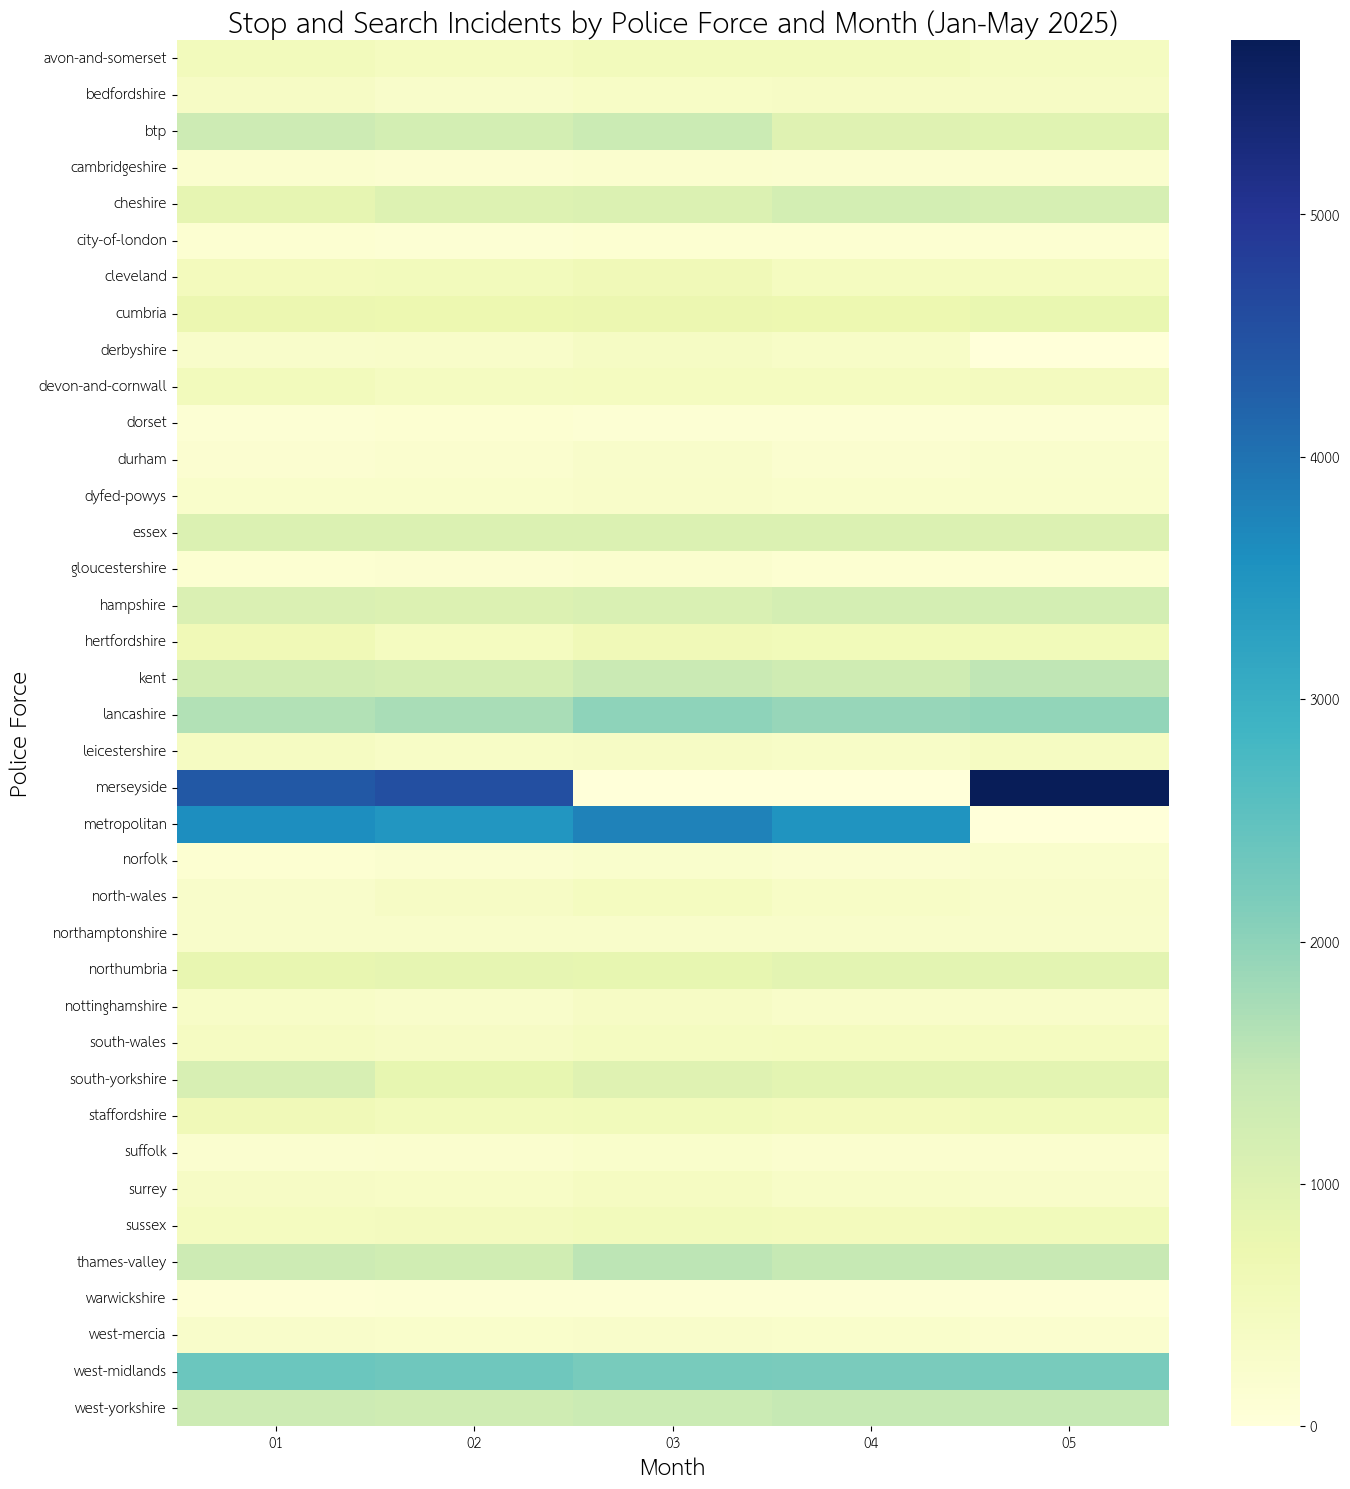

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Police_Force and Month and count the number of incidents
monthly_force_counts = combined_stop_and_search_2025_all_months.groupby(['Police_Force', 'Month']).size().unstack(fill_value=0)

# Create the heatmap without annotations
plt.figure(figsize=(16,18))
sns.heatmap(monthly_force_counts, fmt="d", cmap="YlGnBu")
plt.title('Stop and Search Incidents by Police Force and Month (Jan-May 2025)', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Police Force', fontsize=16)
plt.show()

###ความถี่ของอายุในการเรียกค้นแต่ละเพศเป็นอย่างไร

In [142]:
import matplotlib.pyplot as plt
df = combined_stop_and_search_2025_all_months
df

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Police_Force,Month,Scaled_Age,Age_Range,Is_LonLat_Imputed
0,Person search,2025-01-01T00:05:00+00:00,Unknown,51.062267,-1.311082,Male,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Unknown,Community resolution,True,False,hampshire,01,23.607749,18-24,False
1,Person search,2025-01-01T00:17:00+00:00,Unknown,51.242541,-0.753933,Male,Other ethnic group - Any other ethnic group,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,28.480301,25-34,False
2,Person search,2025-01-01T00:17:00+00:00,Unknown,51.242541,-0.753933,Female,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,34.276703,25-34,False
3,Person search,2025-01-01T00:18:00+00:00,Unknown,51.240856,-0.757030,Male,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,18.640226,18-24,False
4,Person search,2025-01-01T00:18:00+00:00,Unknown,51.242541,-0.753933,Male,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,19.770695,18-24,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155286,Person search,2025-05-31T02:33:00+00:00,Unknown,51.852778,-4.306309,Male,White - English/Welsh/Scottish/Northern Irish/...,White,Unknown,Controlled drugs,Not Recorded,False,False,dyfed-powys,05,17.276021,10-17,False
155287,Person search,2025-05-31T03:13:00+00:00,Unknown,51.855427,-4.311048,Female,White - English/Welsh/Scottish/Northern Irish/...,White,Unknown,Unknown,Not Recorded,False,False,dyfed-powys,05,21.436573,18-24,False
155288,Person search,2025-05-31T03:13:00+00:00,Unknown,51.855427,-4.311048,Female,White - English/Welsh/Scottish/Northern Irish/...,White,Unknown,Offensive weapons,Not Recorded,False,False,dyfed-powys,05,15.708194,10-17,False
155289,Person and Vehicle search,2025-05-31T15:30:00+00:00,Unknown,51.802278,-4.967404,Male,White - English/Welsh/Scottish/Northern Irish/...,White,Unknown,Unknown,Arrest,True,False,dyfed-powys,05,44.561722,over 34,False


In [143]:
df['Scaled_Age'].min()

0.002253659530326524

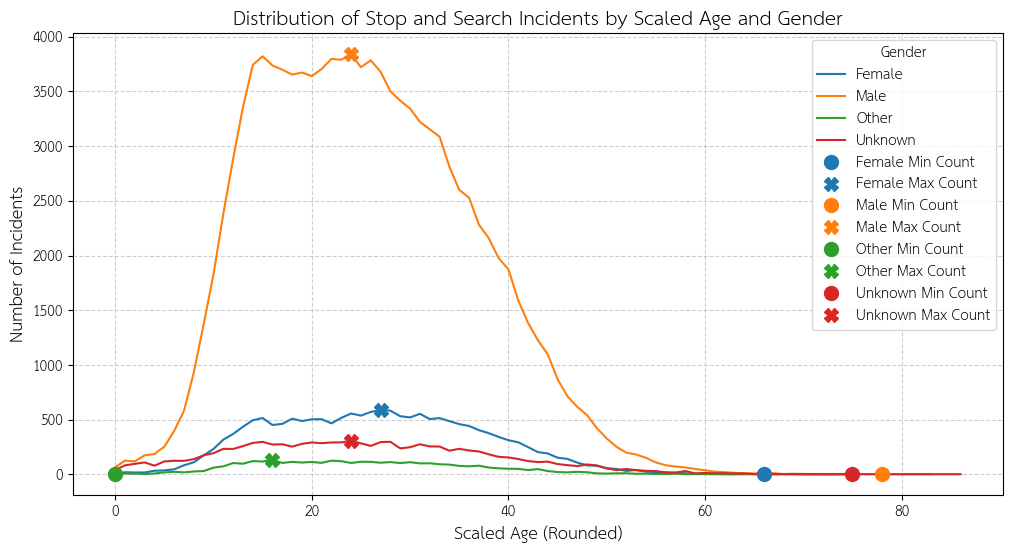

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Round the Scaled_Age to the nearest integer
df['Scaled_Age_Rounded'] = np.round(df['Scaled_Age']).astype(int)

# Calculate counts per age and gender
age_gender_counts = df.groupby(['Scaled_Age_Rounded', 'Gender']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=age_gender_counts, x='Scaled_Age_Rounded', y='Count', hue='Gender')

# Find and plot min/max points for each gender based on Count
for gender in age_gender_counts['Gender'].unique():
    gender_data = age_gender_counts[age_gender_counts['Gender'] == gender]
    min_count_row = gender_data.loc[gender_data['Count'].idxmin()]
    max_count_row = gender_data.loc[gender_data['Count'].idxmax()]

    plt.plot(min_count_row['Scaled_Age_Rounded'], min_count_row['Count'], 'o', color=sns.color_palette()[age_gender_counts['Gender'].unique().tolist().index(gender)], markersize=10, label=f'{gender} Min Count')
    plt.plot(max_count_row['Scaled_Age_Rounded'], max_count_row['Count'], 'X', color=sns.color_palette()[age_gender_counts['Gender'].unique().tolist().index(gender)], markersize=10, label=f'{gender} Max Count')


plt.title('Distribution of Stop and Search Incidents by Scaled Age and Gender', fontsize=14)
plt.xlabel('Scaled Age (Rounded)', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

###พื้นที่ที่มีอัตราการค้นหาสูง มักมีอัตราความสำเร็จสูงหรือต่ำ

In [145]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [146]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [147]:
df = combined_stop_and_search_2025_all_months

/tmp/ipython-input-2356719460.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Outcome linked to object of search'] = df['Outcome linked to object of search'].replace('Unknown', False)


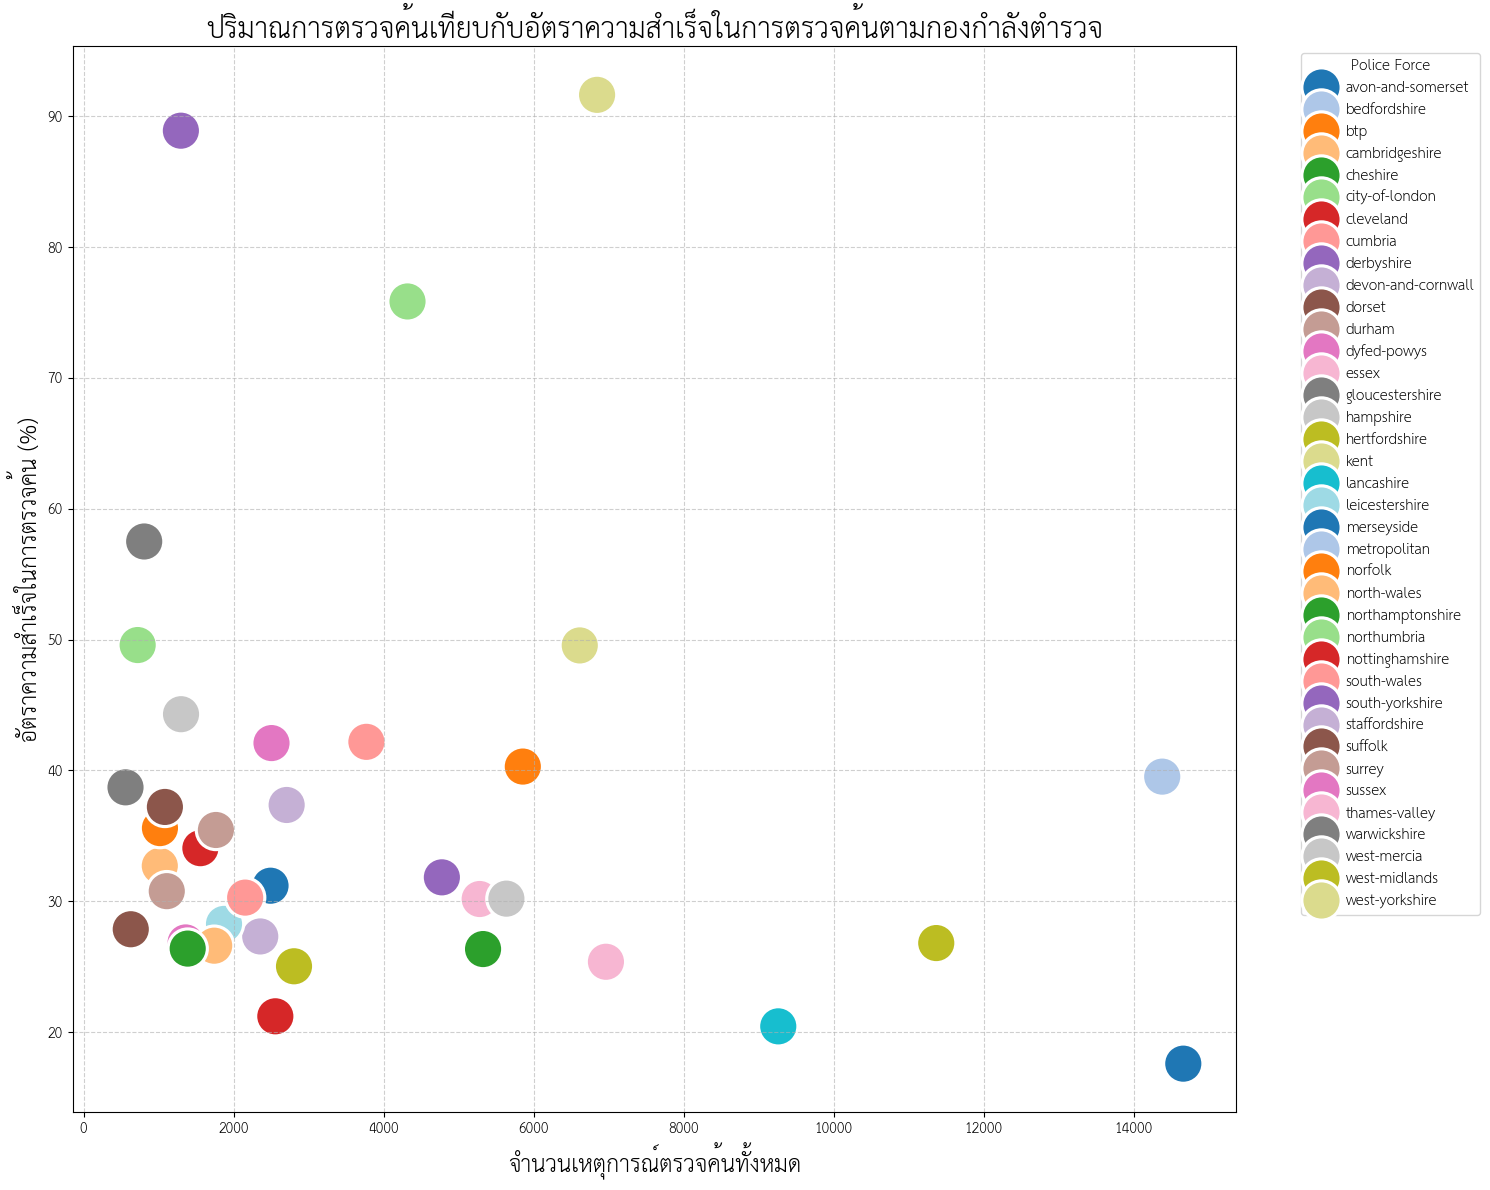

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------------------------------------------------
# การคำนวณอัตราความสำเร็จในการตรวจค้นต่อกองกำลังตำรวจ (Police Force)
# ---------------------------------------------------------------------
# คำนวณอัตราความสำเร็จในการตรวจค้นของแต่ละกองกำลังตำรวจ

# การตรวจค้นจะถือว่าประสบความสำเร็จถ้า 'Outcome linked to object of search' เป็น True หรือ 'Outcome' เป็น 'Arrest'

# ขั้นแรก, จัดการกับค่า 'Unknown' ในคอลัมน์ 'Outcome linked to object of search' หากมีอยู่
df['Outcome linked to object of search'] = df['Outcome linked to object of search'].replace('Unknown', False)
# แทนที่ค่า 'Unknown' ด้วย False (ถือว่าไม่สำเร็จในการเชื่อมโยงกับวัตถุที่ค้นหา)

# กำหนดว่าผลลัพธ์ใดบ้างที่ถือว่าเป็นผลลัพธ์ที่ประสบความสำเร็จ
successful_outcomes = ['Arrest', 'Summons / charged by post', 'Caution', 'Community resolution', 'Penalty Notice for Disorder', 'Khat or Cannabis Warning', 'Detected but no further action']

# คำนวณจำนวนเหตุการณ์ทั้งหมดต่อกองกำลังตำรวจ
total_incidents = df.groupby('Police_Force').size().reset_index(name='Total_Incidents')

# คำนวณจำนวนเหตุการณ์ที่สำเร็จโดยอ้างอิงจากคอลัมน์ 'Outcome linked to object of search' (เป็น True)
successful_linked_outcomes = df[df['Outcome linked to object of search'] == True
].groupby('Police_Force').size().reset_index(name='Successful_Linked_Count')

# คำนวณจำนวนเหตุการณ์ที่สำเร็จโดยอ้างอิงจากคอลัมน์ 'Outcome' (อยู่ในรายการผลลัพธ์ที่กำหนด)
successful_outcome_counts = df[df['Outcome'].isin(successful_outcomes)
].groupby('Police_Force').size().reset_index(name='Successful_Outcome_Count')

# รวมจำนวนการนับทั้งหมดเข้าด้วยกัน
success_analysis = pd.merge(total_incidents, successful_linked_outcomes, on='Police_Force', how='left').fillna(0)
success_analysis = pd.merge(success_analysis, successful_outcome_counts, on='Police_Force', how='left').fillna(0)

# คำนวณจำนวนเหตุการณ์ที่ประสบความสำเร็จโดยรวม (โดยใช้เกณฑ์ทั้งสอง)
# ใช้ค่าสูงสุดเพื่อไม่ให้นับเหตุการณ์เดียวกันซ้ำ หากเข้าเกณฑ์สำเร็จทั้งสองแบบ
success_analysis['Total_Successful_Incidents'] = success_analysis[['Successful_Linked_Count', 'Successful_Outcome_Count']].max(axis=1)

# คำนวณอัตราความสำเร็จ
success_analysis['Success_Rate'] = (success_analysis['Total_Successful_Incidents'] / success_analysis['Total_Incidents']) * 100


# Create the scatter plot
plt.figure(figsize=(15,12))
sns.scatterplot(
    x='Total_Incidents',
    y='Success_Rate',
    data=success_analysis,
    hue='Police_Force',  # ระบายสีจุดตามกองกำลังตำรวจ
    palette='tab20',
    s=800 # ปรับขนาดของจุด

)

plt.title('ปริมาณการตรวจค้นเทียบกับอัตราความสำเร็จในการตรวจค้นตามกองกำลังตำรวจ', fontsize=20)
plt.xlabel('จำนวนเหตุการณ์ตรวจค้นทั้งหมด', fontsize=16)
plt.ylabel('อัตราความสำเร็จในการตรวจค้น (%)', fontsize=16)
plt.legend(title='Police Force', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


###จำนวนการถูกเรียกคนในแต่ละเมือง ระหว่างเพศชายกับเพศหญิง เป็นอย่างไร

In [148]:
import pandas as pd
import plotly.express as px

# ===== 1️⃣ เตรียมข้อมูล =====
df = combined_stop_and_search_2025_all_months.copy()

city_gender_counts = df.groupby(['Police_Force', 'Gender']).size().reset_index(name='Count')

gender_pivot = city_gender_counts.pivot_table(
    index='Police_Force',
    columns='Gender',
    values='Count',
    fill_value=0
).reset_index()

for col in ['Male', 'Female']:
    if col not in gender_pivot.columns:
        gender_pivot[col] = 0

gender_pivot['Total_Count'] = gender_pivot['Male'] + gender_pivot['Female']
gender_pivot['Male_Proportion'] = gender_pivot.apply(
    lambda r: r['Male'] / r['Total_Count'] if r['Total_Count'] > 0 else 0.5,
    axis=1
)
gender_pivot['Female_Proportion'] = 1 - gender_pivot['Male_Proportion']
gender_pivot = gender_pivot[gender_pivot['Total_Count'] > 0]

# ===== 2️⃣ สร้าง Treemap =====
# ใช้ Male_Proportion เป็นสีโดยตรง (0=หญิง100%, 1=ชาย100%)
fig = px.treemap(
    gender_pivot,
    path=[px.Constant("All Police Forces"), 'Police_Force'],
    values='Total_Count',
    color='Male_Proportion',  # ใช้สัดส่วนเพศชาย
    color_continuous_scale=[
        (0.0, '#d73027'),  # แดง = 0% Male → เพศหญิง 100%
        (0.5, '#f7f7f7'),  # เทา = 50% Male → เพศชาย/หญิงใกล้เคียง
        (1.0, '#4575b4')   # น้ำเงิน = 100% Male → เพศชาย 100%
    ],
    range_color=[0, 1],  # 0–1 แทน 0–100%
    title='Treemap: จำนวนการตรวจค้นในแต่ละหน่วยตำรวจ และสัดส่วนเพศ',
    hover_data={
        'Total_Count': True,
        'Male_Proportion': ':.1%',
        'Female_Proportion': ':.1%',
    }
)

# ===== 3️⃣ ปรับ layout และ colorbar =====
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    coloraxis_colorbar=dict(
        title='สัดส่วนเพศชาย',
        tickvals=[0, 0.25, 0.5, 0.75, 1],
        ticktext=['ชาย 0% (หญิง 100%)', 'ชาย 25%', 'ชาย 50%', 'ชาย 75%', 'ชาย 100%']
    )
)

fig.show()


### วัตถุประสงค์ในการสืบค้นแต่ละประเภทมีความแตกต่างทางชาติพันธุ์/เชื้อชาติอย่างไร

In [149]:
import matplotlib.pyplot as plt
df = combined_stop_and_search_2025_all_months
df

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Police_Force,Month,Scaled_Age,Age_Range,Is_LonLat_Imputed,Scaled_Age_Rounded
0,Person search,2025-01-01T00:05:00+00:00,Unknown,51.062267,-1.311082,Male,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Unknown,Community resolution,True,False,hampshire,01,23.607749,18-24,False,24
1,Person search,2025-01-01T00:17:00+00:00,Unknown,51.242541,-0.753933,Male,Other ethnic group - Any other ethnic group,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,28.480301,25-34,False,28
2,Person search,2025-01-01T00:17:00+00:00,Unknown,51.242541,-0.753933,Female,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,34.276703,25-34,False,34
3,Person search,2025-01-01T00:18:00+00:00,Unknown,51.240856,-0.757030,Male,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,18.640226,18-24,False,19
4,Person search,2025-01-01T00:18:00+00:00,Unknown,51.242541,-0.753933,Male,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Unknown,A no further action disposal,False,False,hampshire,01,19.770695,18-24,False,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155286,Person search,2025-05-31T02:33:00+00:00,Unknown,51.852778,-4.306309,Male,White - English/Welsh/Scottish/Northern Irish/...,White,Unknown,Controlled drugs,Not Recorded,False,False,dyfed-powys,05,17.276021,10-17,False,17
155287,Person search,2025-05-31T03:13:00+00:00,Unknown,51.855427,-4.311048,Female,White - English/Welsh/Scottish/Northern Irish/...,White,Unknown,Unknown,Not Recorded,False,False,dyfed-powys,05,21.436573,18-24,False,21
155288,Person search,2025-05-31T03:13:00+00:00,Unknown,51.855427,-4.311048,Female,White - English/Welsh/Scottish/Northern Irish/...,White,Unknown,Offensive weapons,Not Recorded,False,False,dyfed-powys,05,15.708194,10-17,False,16
155289,Person and Vehicle search,2025-05-31T15:30:00+00:00,Unknown,51.802278,-4.967404,Male,White - English/Welsh/Scottish/Northern Irish/...,White,Unknown,Unknown,Arrest,True,False,dyfed-powys,05,44.561722,over 34,False,45


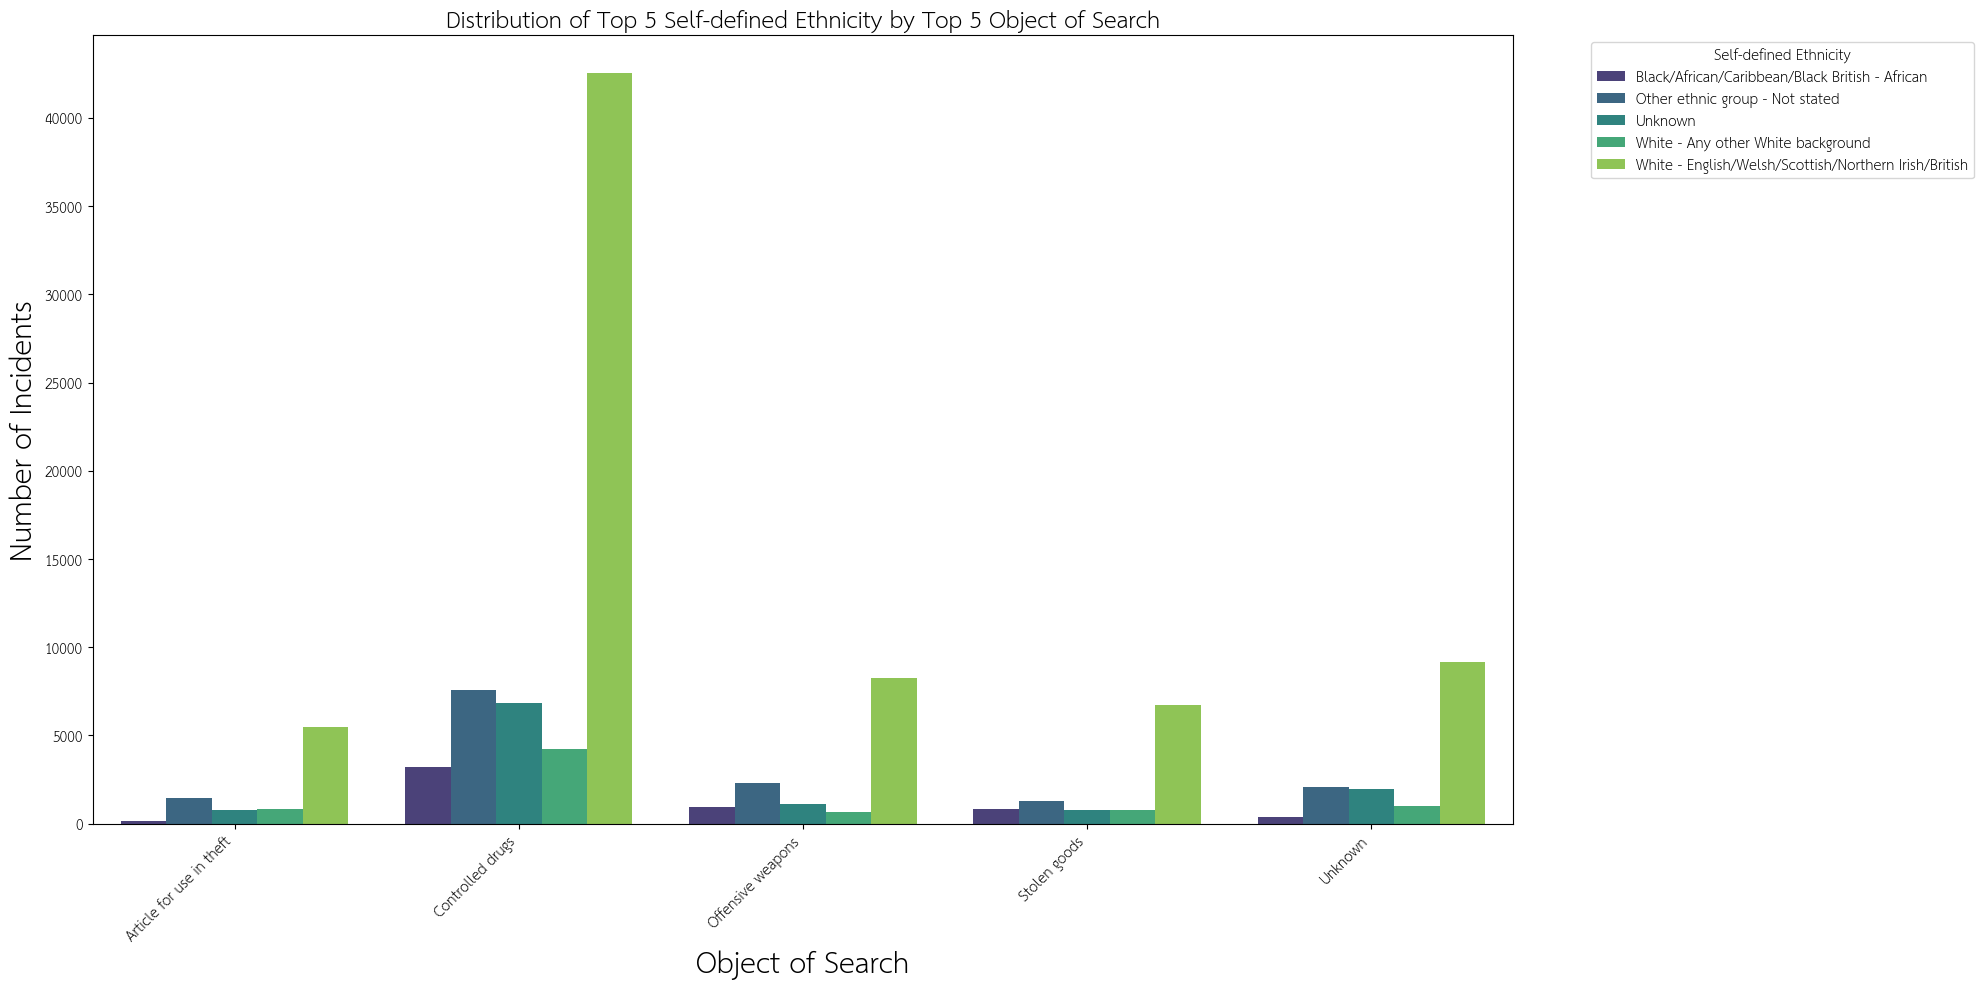

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. เตรียมข้อมูล: นับจำนวนเหตุการณ์ตาม Object of search และ Self-defined ethnicity
object_ethnicity_counts = df.groupby(
    ['Object of search', 'Self-defined ethnicity']
).size().reset_index(name='Count')

# 2. เลือก Object of search 5 อันดับแรกที่พบบ่อยที่สุด
top_objects = df['Object of search'].value_counts().nlargest(5).index.tolist()

# 3. เลือก Self-defined ethnicity 5 อันดับแรกที่พบบ่อยที่สุด
top_ethnicities = df['Self-defined ethnicity'].value_counts().nlargest(5).index.tolist()

# 4. กรองข้อมูลสำหรับ Plot
plot_data = object_ethnicity_counts[
    (object_ethnicity_counts['Object of search'].isin(top_objects)) &
    (object_ethnicity_counts['Self-defined ethnicity'].isin(top_ethnicities))
]

# 5. สร้าง Grouped Bar Chart
plt.figure(figsize=(20, 10))
sns.barplot(
    data=plot_data,
    x='Object of search',
    y='Count',
    hue='Self-defined ethnicity',
    palette='viridis'
)

plt.title('Distribution of Top 5 Self-defined Ethnicity by Top 5 Object of Search', fontsize=16)
plt.xlabel('Object of Search', fontsize=20)
plt.ylabel('Number of Incidents', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Self-defined Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##Outcomes

### 1.เกิด Outcomes Type เท่าไหร่และคิดเป็นกี่เปอร์เซ็นต์ เรียง Top 5

In [151]:
# 1. คำนวณจำนวนและสัดส่วนของแต่ละ Outcome type ในภาพรวม
total_outcomes_breakdown = combined_outcomes_2025_all_months.groupby('Outcome type').size().reset_index(name='Total_Count')
total_outcomes_breakdown['Overall_Proportion'] = (
    total_outcomes_breakdown['Total_Count'] / total_outcomes_breakdown['Total_Count'].sum()
) * 100 # แปลงเป็นเปอร์เซ็นต์

print("Overall Ranking of Outcome Types Across All Police Forces:")
# จัดเรียงตามจำนวนมากไปน้อยและแสดงผล
display(total_outcomes_breakdown.sort_values(by='Total_Count', ascending=False).round(2).astype(str))

Overall Ranking of Outcome Types Across All Police Forces:


,Outcome type,Total_Count,Overall_Proportion
11,Unable to prosecute suspect,332509,43.84
4,Investigation complete; no suspect identified,288727,38.06
9,Suspect charged,75012,9.89
5,Local resolution,25650,3.38
0,Action to be taken by another organisation,13107,1.73
6,Offender given a caution,7317,0.96
3,Further investigation is not in the public int...,6445,0.85
1,Formal action is not in the public interest,4451,0.59
2,Further action is not in the public interest,3756,0.5
10,Suspect charged as part of another case,837,0.11


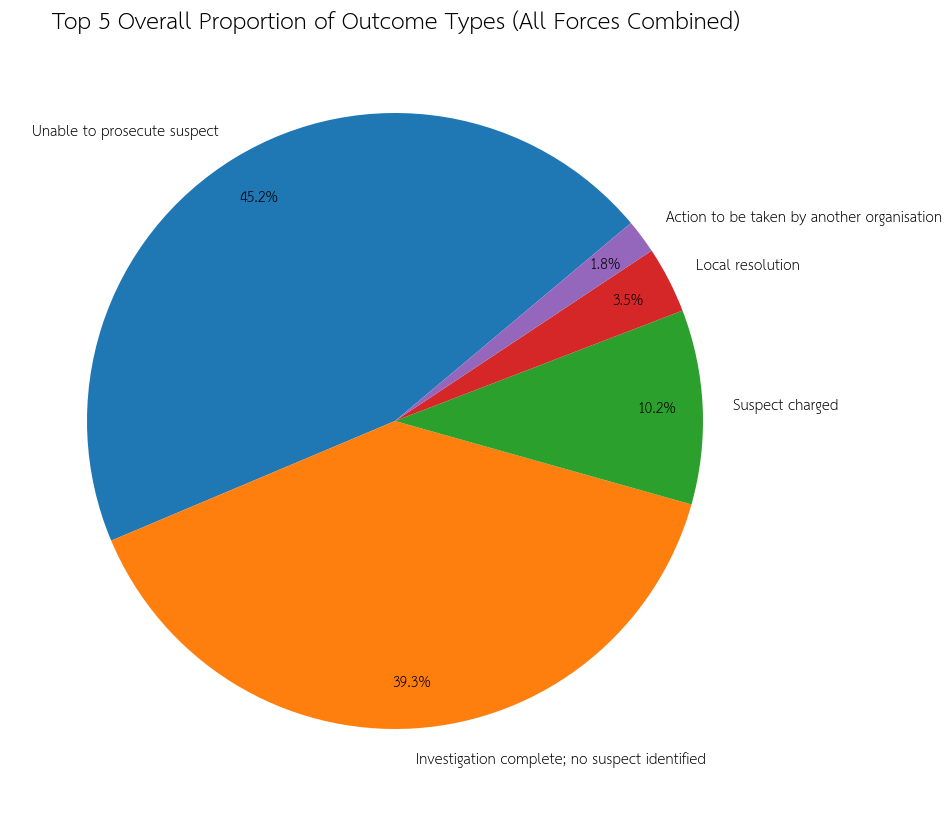

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top_10_outcomes = total_outcomes_breakdown.nlargest(5, 'Total_Count')
plt.figure(figsize=(10, 10))
plt.pie(
    top_10_outcomes['Overall_Proportion'],
    labels=top_10_outcomes['Outcome type'],
    autopct='%1.1f%%', # แสดงผลเป็นเปอร์เซ็นต์
    startangle=40,
    pctdistance=0.85 # ระยะห่างของข้อความเปอร์เซ็นต์จากศูนย์กลาง
)
plt.title('Top 5 Overall Proportion of Outcome Types (All Forces Combined)', fontsize=16)
plt.show()

### 2.แนวโน้มรายเดือนของ Outcome Type ที่พบบ่อยที่สุด

เราสามารถดูได้ว่าจำนวนคดีใน Outcome type ที่สำคัญมีการเปลี่ยนแปลงอย่างไรในแต่ละเดือน

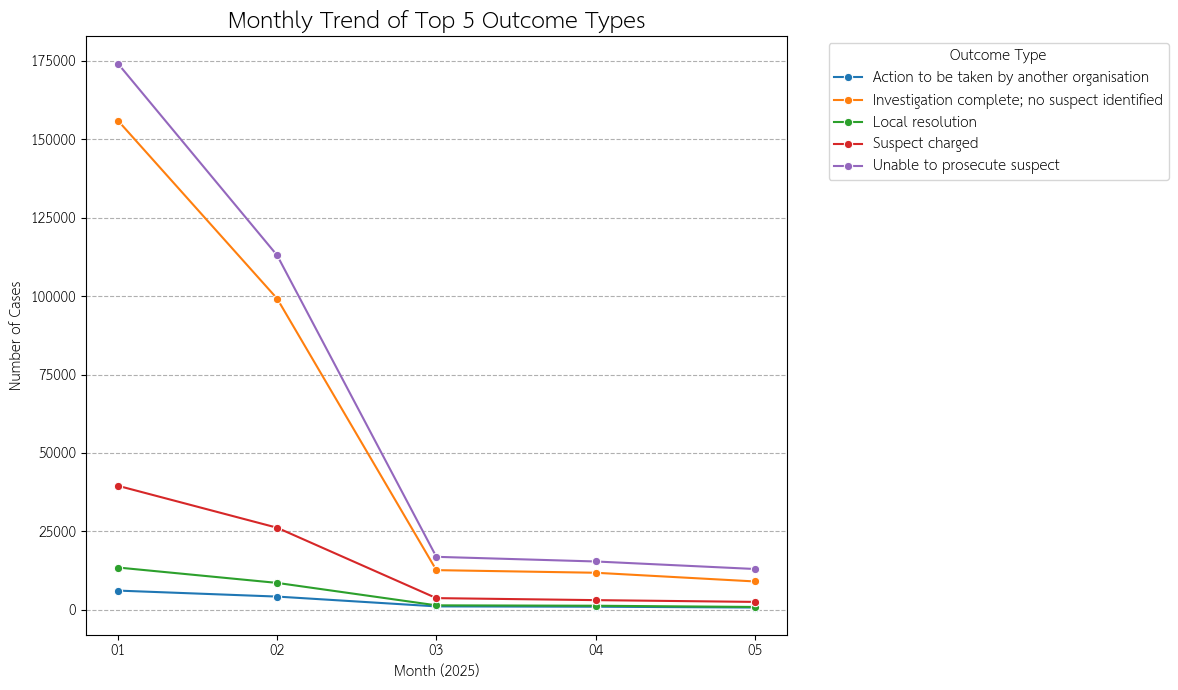

In [153]:
# เลือก Outcome type 5 อันดับแรกจาก total_outcomes_breakdown ที่คำนวณไว้ก่อนหน้านี้
top_5_outcome_types = total_outcomes_breakdown.nlargest(5, 'Total_Count')['Outcome type'].tolist()

# กรองข้อมูลเฉพาะ Outcome type 5 อันดับแรก
df_top_outcomes = combined_outcomes_2025_all_months[
    combined_outcomes_2025_all_months['Outcome type'].isin(top_5_outcome_types)
].copy()

# นับจำนวนคดีแยกตามเดือนและ Outcome type
monthly_outcome_counts = df_top_outcomes.groupby(['Month', 'Outcome type']).size().reset_index(name='Count')

# สร้างกราฟเส้นแสดงแนวโน้มรายเดือน
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=monthly_outcome_counts,
    x='Month',
    y='Count',
    hue='Outcome type',
    marker='o' # เพิ่ม marker ที่จุดข้อมูล
)

plt.title('Monthly Trend of Top 5 Outcome Types', fontsize=16)
plt.xlabel('Month (2025)')
plt.ylabel('Number of Cases')
plt.xticks(monthly_outcome_counts['Month'].unique()) # แสดงทุกเดือนบนแกน x
plt.grid(axis='y', linestyle='--')
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [154]:
# ตรวจสอบว่ามีค่าซ้ำกันในคอลัมน์ 'Crime ID' หรือไม่
# duplicated() จะคืนค่าเป็น Series ของ True/False โดย True หมายถึงค่าซ้ำ
# keep=False จะทำเครื่องหมายทุกค่าที่ซ้ำกันเป็น True
duplicate_crime_ids_mask = combined_outcomes_2025_all_months['Crime ID'].duplicated(keep=False)

# กรองเฉพาะแถวที่มี Crime ID ซ้ำกันทั้งหมด (ไม่ว่าเดือนไหนก็ตาม)
duplicate_crime_rows_all = combined_outcomes_2025_all_months[duplicate_crime_ids_mask].sort_values(by=['Crime ID', 'Month'])

# Group by Crime ID และนับจำนวน Outcome type ที่ไม่ซ้ำกันสำหรับแต่ละ Crime ID ที่ซ้ำกัน
outcome_change_check_all = duplicate_crime_rows_all.groupby('Crime ID')['Outcome type'].nunique().reset_index(name='Unique_Outcome_Types_All_Months')

# กรองเฉพาะ Crime ID ที่มี Unique_Outcome_Types_All_Months มากกว่า 1 (หมายถึง Outcome type เปลี่ยนแปลงในภาพรวม)
crime_ids_with_outcome_change_all = outcome_change_check_all[outcome_change_check_all['Unique_Outcome_Types_All_Months'] > 1]['Crime ID']

print(f"จำนวน Crime ID ที่ซ้ำกันและมี Outcome type เปลี่ยนแปลง (ไม่ว่าเดือนเดียวกันหรือต่างเดือน): {len(crime_ids_with_outcome_change_all)}")

# หากต้องการดูตัวอย่าง Crime ID ที่มี Outcome type เปลี่ยนแปลงในภาพรวม:
if not crime_ids_with_outcome_change_all.empty:
    print("\nตัวอย่าง Crime ID ที่ซ้ำกันและมี Outcome type เปลี่ยนแปลง (ไม่ว่าเดือนเดียวกันหรือต่างเดือน):")
    # แสดงข้อมูลเต็มของ Crime ID เหล่านี้
    display(duplicate_crime_rows_all[duplicate_crime_rows_all['Crime ID'].isin(crime_ids_with_outcome_change_all)].head(5))
else:
    print("\nไม่มี Crime ID ที่ซ้ำกันและมี Outcome type เปลี่ยนแปลงในภาพรวม")

จำนวน Crime ID ที่ซ้ำกันและมี Outcome type เปลี่ยนแปลง (ไม่ว่าเดือนเดียวกันหรือต่างเดือน): 1827

ตัวอย่าง Crime ID ที่ซ้ำกันและมี Outcome type เปลี่ยนแปลง (ไม่ว่าเดือนเดียวกันหรือต่างเดือน):


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed,Outcome_Change_Status,month_sort
29734,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,01,South Wales Police,South Wales Police,-3.949255,51.651274,On or near Clos Calon Lan,W01000820,Swansea 009D,Investigation complete; no suspect identified,south-wales,False,True,0
429596,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,02,South Wales Police,South Wales Police,-3.949255,51.651274,On or near Clos Calon Lan,W01000820,Swansea 009D,Suspect charged,south-wales,False,True,1
111715,00166cc96c988d355ee0a73debb789350128d91891db68...,01,Merseyside Police,Merseyside Police,-2.990455,53.454099,On or near Supermarket,E01006964,Sefton 036A,Further action is not in the public interest,merseyside,False,True,0
537798,00166cc96c988d355ee0a73debb789350128d91891db68...,02,Merseyside Police,Merseyside Police,-2.990455,53.454099,On or near Supermarket,E01006964,Sefton 036A,Investigation complete; no suspect identified,merseyside,False,True,1
353922,0030afc86d33596b53d38bc8f51e33ab911f569a0f2209...,01,North Wales Police,North Wales Police,-3.798020,53.138156,On or near Ancaster Square,W01000134,Conwy 015B,Investigation complete; no suspect identified,north-wales,False,True,0


### 3.รูปแบบการเปลี่ยนแปลง Outcome type และจำนวนครั้งที่พบ ในCrime ID ที่มีการเปลี่ยนแปลง Outcome type

In [155]:
# กรองเฉพาะแถวที่มี Crime ID ที่มีการเปลี่ยนแปลง Outcome type (ใช้ crime_ids_with_outcome_change_all จากเซลล์ก่อนหน้า)
df_with_changes = combined_outcomes_2025_all_months[combined_outcomes_2025_all_months['Crime ID'].isin(crime_ids_with_outcome_change_all)].copy()

# จัดเรียงตาม Crime ID และ Month เพื่อให้ง่ายต่อการระบุ outcome แรกและสุดท้าย
df_with_changes = df_with_changes.sort_values(by=['Crime ID', 'Month'])

# หาสถานะ Outcome type แรกสำหรับแต่ละ Crime ID
first_outcomes = df_with_changes.groupby('Crime ID').first()['Outcome type'].reset_index(name='First_Outcome_type')

# หาสถานะ Outcome type สุดท้ายสำหรับแต่ละ Crime ID
last_outcomes = df_with_changes.groupby('Crime ID').last()['Outcome type'].reset_index(name='Last_Outcome_type')

# รวมข้อมูล outcome แรกและสุดท้ายเข้าด้วยกัน
outcome_start_end = pd.merge(first_outcomes, last_outcomes, on='Crime ID')

# กรองเฉพาะแถวที่ Outcome type เริ่มต้นและสิ้นสุดแตกต่างกัน
outcome_start_end_changed = outcome_start_end[outcome_start_end['First_Outcome_type'] != outcome_start_end['Last_Outcome_type']].copy()

# นับจำนวนรูปแบบการเปลี่ยนแปลงที่ไม่ซ้ำกัน
num_unique_transitions = outcome_start_end_changed.groupby(['First_Outcome_type', 'Last_Outcome_type']).size().reset_index(name='Count')

print(f"จำนวนรูปแบบการเปลี่ยนแปลง Outcome type ที่แตกต่างกัน: {len(num_unique_transitions)}")

print("\nรายละเอียดรูปแบบการเปลี่ยนแปลง Outcome type และจำนวนครั้งที่พบ:")
# แสดงรูปแบบการเปลี่ยนแปลงทั้งหมดและจำนวนครั้งที่พบ (เรียงตามจำนวนมากไปน้อย)
display(num_unique_transitions.sort_values(by='Count', ascending=False))

จำนวนรูปแบบการเปลี่ยนแปลง Outcome type ที่แตกต่างกัน: 72

รายละเอียดรูปแบบการเปลี่ยนแปลง Outcome type และจำนวนครั้งที่พบ:


,First_Outcome_type,Last_Outcome_type,Count
35,Investigation complete; no suspect identified,Suspect charged,285
37,Investigation complete; no suspect identified,Unable to prosecute suspect,252
13,Formal action is not in the public interest,Suspect charged,208
70,Unable to prosecute suspect,Suspect charged,197
15,Formal action is not in the public interest,Unable to prosecute suspect,145
...,...,...,...
11,Formal action is not in the public interest,Local resolution,1
51,Offender given a drugs possession warning,Unable to prosecute suspect,1
44,Offender given a caution,Action to be taken by another organisation,1
60,Suspect charged as part of another case,Investigation complete; no suspect identified,1


In [156]:
# ตรวจสอบว่า DataFrame ที่จำเป็นถูกนิยามไว้แล้ว
if 'outcome_start_end_changed' not in locals() and 'outcome_start_end_changed' not in globals():
    print("Error: 'outcome_start_end_changed' is not defined. Please run the cell that calculates outcome_start_end_changed first.")
elif 'combined_outcomes_2025_all_months' not in locals() and 'combined_outcomes_2025_all_months' not in globals():
     print("Error: 'combined_outcomes_2025_all_months' is not defined. Please run the cell that loads and cleans the data first.")
else:
    # เลือกเฉพาะ Crime ID และ Police_Force จากข้อมูลต้นฉบับ
    # ใช้ drop_duplicates เพื่อให้เหลือเพียงแถวเดียวต่อ Crime ID
    crime_id_police_force = combined_outcomes_2025_all_months[['Crime ID', 'Police_Force']].drop_duplicates()

    # รวม outcome_start_end_changed กับ crime_id_police_force เพื่อเพิ่มคอลัมน์ Police_Force
    outcome_transitions_with_force = pd.merge(
        outcome_start_end_changed,
        crime_id_police_force,
        on='Crime ID',
        how='left' # ใช้ left merge เพื่อเก็บทุก Crime ID จาก outcome_start_end_changed
    )

    print("ตารางแสดง Crime ID, Police Force, Outcome type เริ่มต้น และ Outcome type สิ้นสุด สำหรับคดีที่มีการเปลี่ยนแปลง:")
    display(outcome_transitions_with_force.head())

    print(f"\nจำนวนคดีที่มีการเปลี่ยนแปลง Outcome type ทั้งหมด: {len(outcome_transitions_with_force)}")

ตารางแสดง Crime ID, Police Force, Outcome type เริ่มต้น และ Outcome type สิ้นสุด สำหรับคดีที่มีการเปลี่ยนแปลง:


,Crime ID,First_Outcome_type,Last_Outcome_type,Police_Force
0,00144d7659a411c09c46610a3ab68c0ec86a05e5ddca71...,Investigation complete; no suspect identified,Suspect charged,south-wales
1,00166cc96c988d355ee0a73debb789350128d91891db68...,Further action is not in the public interest,Investigation complete; no suspect identified,merseyside
2,0030afc86d33596b53d38bc8f51e33ab911f569a0f2209...,Investigation complete; no suspect identified,Suspect charged,north-wales
3,004742086febfe3dd4e6f9afc250e0a17767d3b35e2417...,Investigation complete; no suspect identified,Suspect charged,metropolitan
4,00858cae3f39639e6234299a1e2022491c81430bed97db...,Formal action is not in the public interest,Suspect charged,avon-and-somerset



จำนวนคดีที่มีการเปลี่ยนแปลง Outcome type ทั้งหมด: 1827


In [157]:
# Group by Police_Force and count the number of Crime IDs that had an outcome change
police_force_outcome_changes_count = outcome_transitions_with_force.groupby('Police_Force').size().reset_index(name='Number of Cases with Outcome Changes')

# Sort by the count in descending order to see which police forces had the most changes
police_force_outcome_changes_count = police_force_outcome_changes_count.sort_values(by='Number of Cases with Outcome Changes', ascending=False)

print("จำนวนคดีที่มีการเปลี่ยนแปลง Outcome type ในแต่ละ Police Force (เรียงจากมากไปน้อย):")
display(police_force_outcome_changes_count)

จำนวนคดีที่มีการเปลี่ยนแปลง Outcome type ในแต่ละ Police Force (เรียงจากมากไปน้อย):


,Police_Force,Number of Cases with Outcome Changes
0,avon-and-somerset,500
16,metropolitan,208
19,northumbria,137
17,north-wales,125
8,dyfed-powys,87
27,west-midlands,85
14,lincolnshire,76
6,dorset,74
25,warwickshire,66
23,staffordshire,61


นับจำนวน Crime ID ที่มีการเปลี่ยนแปลง Outcome type อย่างน้อยหนึ่งครั้ง ในแต่ละ Police Force

- นับจากอะไร: นับจากจำนวนแถวใน DataFrame outcome_transitions_with_force ซึ่ง DataFrame นี้ได้ถูกสร้างขึ้นจากการรวมข้อมูลของ Crime ID ที่มีการเปลี่ยนแปลง Outcome type (ได้จากเซลล์ก่อนหน้า) เข้ากับข้อมูลของ Police Force ที่เกี่ยวข้อง
- สรุป: ตัวเลขในคอลัมน์นี้คือ จำนวนคดี (Unique Crime ID) ในแต่ละ Police Force ที่มีสถานะ Outcome type เปลี่ยนแปลงไปจากเดิม ตลอดช่วงเดือน มกราคม - พฤษภาคม 2025 ที่เราได้รวบรวมมาค่ะ

ตัวอย่างเช่น ในแถวแรก avon-and-somerset มีค่า Number of Cases with Outcome Changes เป็น 500 หมายความว่า มีคดีอาญา (Crime ID) ทั้งหมด 500 คดีในเขต Avon and Somerset ที่มีการบันทึกสถานะ Outcome type แตกต่างกันในแต่ละเดือนที่ปรากฏในข้อมูล

#### ตัวอย่าง จำนวนการเปลี่ยนแปลง Outcome Type ใน Police Force

-  avon-and-somerset
- metropolitan

In [158]:
# กรองข้อมูลเฉพาะ Police Force ที่ต้องการ ('avon-and-somerset')
# ตรวจสอบว่า outcome_transitions_with_force ถูกนิยามไว้แล้ว
if 'outcome_transitions_with_force' not in locals() and 'outcome_transitions_with_force' not in globals():
    print("Error: 'outcome_transitions_with_force' is not defined. Please run the cell that creates this DataFrame first.")
else:
    avon_and_somerset_transitions = outcome_transitions_with_force[
        outcome_transitions_with_force['Police_Force'] == 'avon-and-somerset'
    ].copy()

    # นับจำนวนการเปลี่ยนแปลงจาก First_Outcome_type ไป Last_Outcome_type ใน Avon and Somerset
    avon_and_somerset_transition_counts = avon_and_somerset_transitions.groupby(
        ['First_Outcome_type', 'Last_Outcome_type']
    ).size().reset_index(name='Count')

    # จัดเรียงตามจำนวนมากไปน้อย
    avon_and_somerset_transition_counts = avon_and_somerset_transition_counts.sort_values(by='Count', ascending=False)

    print("จำนวนการเปลี่ยนแปลง Outcome Type ในเขต avon-and-somerset:")
    display(avon_and_somerset_transition_counts)

จำนวนการเปลี่ยนแปลง Outcome Type ในเขต avon-and-somerset:


,First_Outcome_type,Last_Outcome_type,Count
7,Formal action is not in the public interest,Suspect charged,206
9,Formal action is not in the public interest,Unable to prosecute suspect,83
35,Unable to prosecute suspect,Suspect charged,54
33,Unable to prosecute suspect,Formal action is not in the public interest,37
25,Offender given a caution,Further action is not in the public interest,16
17,Investigation complete; no suspect identified,Unable to prosecute suspect,11
16,Investigation complete; no suspect identified,Suspect charged,9
18,Local resolution,Further action is not in the public interest,8
27,Offender given a caution,Unable to prosecute suspect,7
31,Suspect charged as part of another case,Suspect charged,7


In [159]:
# กรองข้อมูลเฉพาะ Police Force ที่ต้องการ ('metropolitan')
# ตรวจสอบว่า outcome_transitions_with_force ถูกนิยามไว้แล้ว
if 'outcome_transitions_with_force' not in locals() and 'outcome_transitions_with_force' not in globals():
    print("Error: 'outcome_transitions_with_force' is not defined. Please run the cell that creates this DataFrame first.")
else:
    metropolitan_transitions = outcome_transitions_with_force[
        outcome_transitions_with_force['Police_Force'] == 'metropolitan'
    ].copy()

    # นับจำนวนการเปลี่ยนแปลงจาก First_Outcome_type ไป Last_Outcome_type ใน Metropolitan
    metropolitan_transition_counts = metropolitan_transitions.groupby(
        ['First_Outcome_type', 'Last_Outcome_type']
    ).size().reset_index(name='Count')

    # จัดเรียงตามจำนวนมากไปน้อย
    metropolitan_transition_counts = metropolitan_transition_counts.sort_values(by='Count', ascending=False)

    print("จำนวนการเปลี่ยนแปลง Outcome Type ในเขต Metropolitan:")
    display(metropolitan_transition_counts)

จำนวนการเปลี่ยนแปลง Outcome Type ในเขต Metropolitan:


,First_Outcome_type,Last_Outcome_type,Count
8,Investigation complete; no suspect identified,Unable to prosecute suspect,62
7,Investigation complete; no suspect identified,Suspect charged,50
17,Unable to prosecute suspect,Suspect charged,30
5,Investigation complete; no suspect identified,Local resolution,13
14,Suspect charged,Unable to prosecute suspect,13
15,Unable to prosecute suspect,Investigation complete; no suspect identified,12
3,Formal action is not in the public interest,Unable to prosecute suspect,6
2,Formal action is not in the public interest,Investigation complete; no suspect identified,5
4,Further investigation is not in the public int...,Unable to prosecute suspect,4
0,Action to be taken by another organisation,Unable to prosecute suspect,2


##Street

### หน่วยงานตำรวจ (Police Force) ใดดูแลพื้นที่ที่มีคดีมากที่สุดและคดีนั้นคืออะไร?

In [160]:
# นับจำนวนคดี (rows) ในแต่ละ Police Force
crime_counts_by_falls_within = combined_street_2025_all_months.groupby('Falls within').size().reset_index(name='Total_Crimes')

# เรียงจากมากไปน้อย
crime_counts_by_falls_within = crime_counts_by_falls_within.sort_values(by='Total_Crimes', ascending=False)

# แสดงผลลัพธ์
print("จำนวนคดีที่เกิดขึ้นในแต่ละ  Falls within:")
display(crime_counts_by_falls_within.head(10))  # แสดง 10 อันดับแรก

จำนวนคดีที่เกิดขึ้นในแต่ละ  Falls within:


,Falls within,Total_Crimes
24,Metropolitan Police Service,79977
37,Thames Valley Police,28276
0,Avon and Somerset Constabulary,27972
40,West Midlands Police,25226
32,South Yorkshire Police,24894
20,Lancashire Constabulary,24516
29,Northumbria Police,24236
41,West Yorkshire Police,22891
9,Devon & Cornwall Police,21708
23,Merseyside Police,21699


In [161]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [162]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

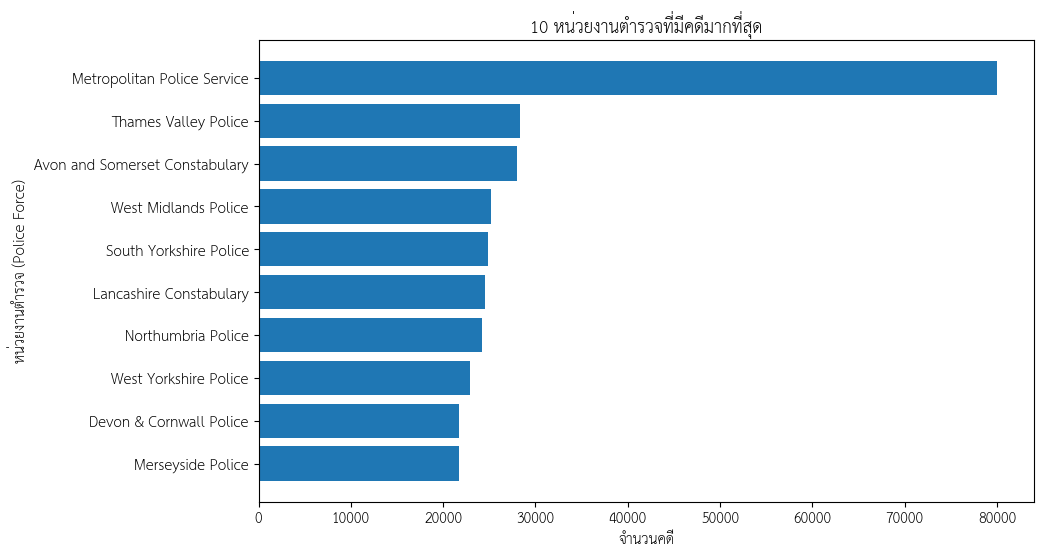

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(crime_counts_by_falls_within['Falls within'][:10], crime_counts_by_falls_within['Total_Crimes'][:10])
plt.xlabel('จำนวนคดี')
plt.ylabel('หน่วยงานตำรวจ (Police Force)')
plt.title('10 หน่วยงานตำรวจที่มีคดีมากที่สุด')
plt.gca().invert_yaxis()  # ให้มากที่สุดอยู่ด้านบน
plt.show()

In [164]:
# ค้นหาหน่วยงานตำรวจที่มีจำนวนคดีมากที่สุด
most_crimes_falls_within = crime_counts_by_falls_within.iloc[0]['Falls within']

print(f"หน่วยงานตำรวจที่มีคดีมากที่สุดคือ: {most_crimes_falls_within}")

# กรอง DataFrame สำหรับหน่วยงานตำรวจที่มีคดีมากที่สุด
most_crimes_df = combined_street_2025_all_months[
    combined_street_2025_all_months['Falls within'] == most_crimes_falls_within
]

# นับจำนวนคดีของแต่ละประเภทอาชญากรรมในหน่วยงานตำรวจนั้น
crime_type_counts_in_most_crimes_falls_within = most_crimes_df['Crime type'].value_counts()

print(f"\nประเภทอาชญากรรมที่พบมากที่สุดใน {most_crimes_falls_within}:")
display(crime_type_counts_in_most_crimes_falls_within.head(5)) # แสดง 5 อันดับแรก

หน่วยงานตำรวจที่มีคดีมากที่สุดคือ: Metropolitan Police Service

ประเภทอาชญากรรมที่พบมากที่สุดใน Metropolitan Police Service:


,count
Crime type,
Violence and sexual offences,19678
Anti-social behaviour,9163
Other theft,7953
Theft from the person,7581
Vehicle crime,7278


### ประเภทอาชญากรรมใดพบมากที่สุดโดยรวม

In [165]:
# นับจำนวนคดีของแต่ละประเภทอาชญากรรมทั้งหมด
overall_crime_type_counts = combined_street_2025_all_months['Crime type'].value_counts()

print("ประเภทอาชญากรรมที่พบมากที่สุดโดยรวม:")
display(overall_crime_type_counts)

ประเภทอาชญากรรมที่พบมากที่สุดโดยรวม:


,count
Crime type,
Violence and sexual offences,248074
Anti-social behaviour,69836
Shoplifting,59366
Criminal damage and arson,51178
Public order,46608
Other theft,45818
Vehicle crime,36025
Burglary,27853
Drugs,24257


### แนวโน้มจำนวนคดีรายเดือนของประเภทอาชญากรรม

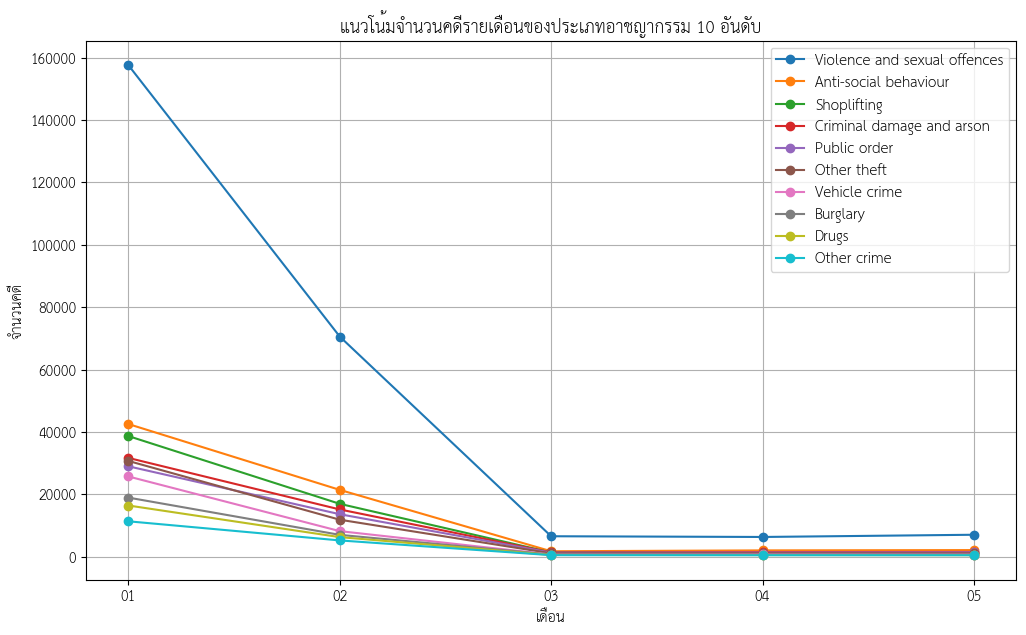

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

# นับจำนวนคดีต่อ Crime Type ในแต่ละเดือน
trend_by_type = (
    combined_street_2025_all_months
    .groupby(['Crime type', 'Month'])
    .size()
    .reset_index(name='Total_Crimes')
)

# เรียงเดือนให้ถูกลำดับ (กรณี Month เป็น string)
trend_by_type['Month'] = pd.Categorical(
    trend_by_type['Month'],
    categories=sorted(trend_by_type['Month'].unique()),
    ordered=True
)

trend_by_type = trend_by_type.sort_values(['Crime type', 'Month'])

# วาดกราฟแนวโน้มสำหรับ Crime Type ยอดนิยม 5 อันดับ
top5_types = (
    combined_street_2025_all_months['Crime type']
    .value_counts()
    .head(10)
    .index
)

plt.figure(figsize=(12,7))
for ctype in top5_types:
    data = trend_by_type[trend_by_type['Crime type'] == ctype]
    plt.plot(data['Month'], data['Total_Crimes'], marker='o', label=ctype)

plt.title("แนวโน้มจำนวนคดีรายเดือนของประเภทอาชญากรรม 10 อันดับ")
plt.xlabel("เดือน")
plt.ylabel("จำนวนคดี")
plt.legend()
plt.grid(True)
plt.show()


### สัดส่วนของประเภทอาชญากรรม

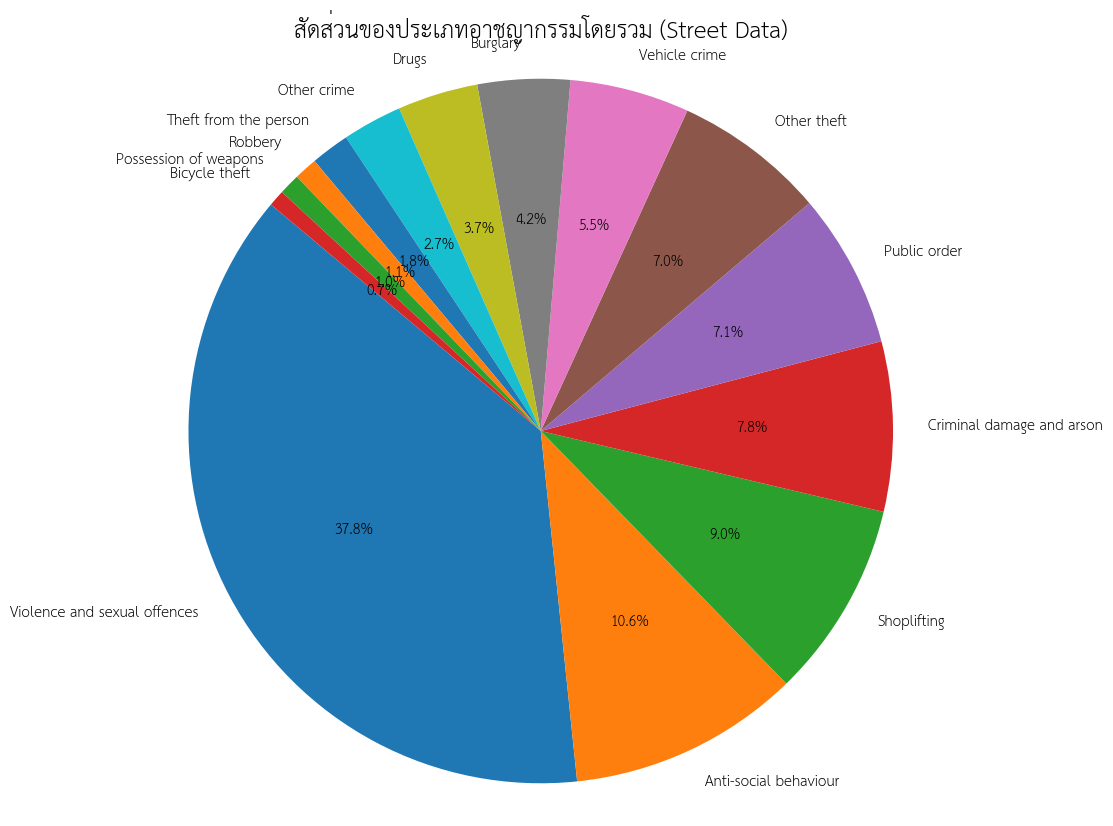

In [167]:
import matplotlib.pyplot as plt

# Calculate the value counts for each crime type
crime_type_counts = combined_street_2025_all_months['Crime type'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    crime_type_counts,
    labels=crime_type_counts.index,
    autopct='%1.1f%%',  # Show percentages with one decimal place
    startangle=140,     # Start the first slice at 140 degrees
    textprops={'fontsize': 10} # Adjust text size
)

plt.title('สัดส่วนของประเภทอาชญากรรมโดยรวม (Street Data)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### สัดส่วนผลลัพธ์สุดท้ายของคดีอาชญากรรม

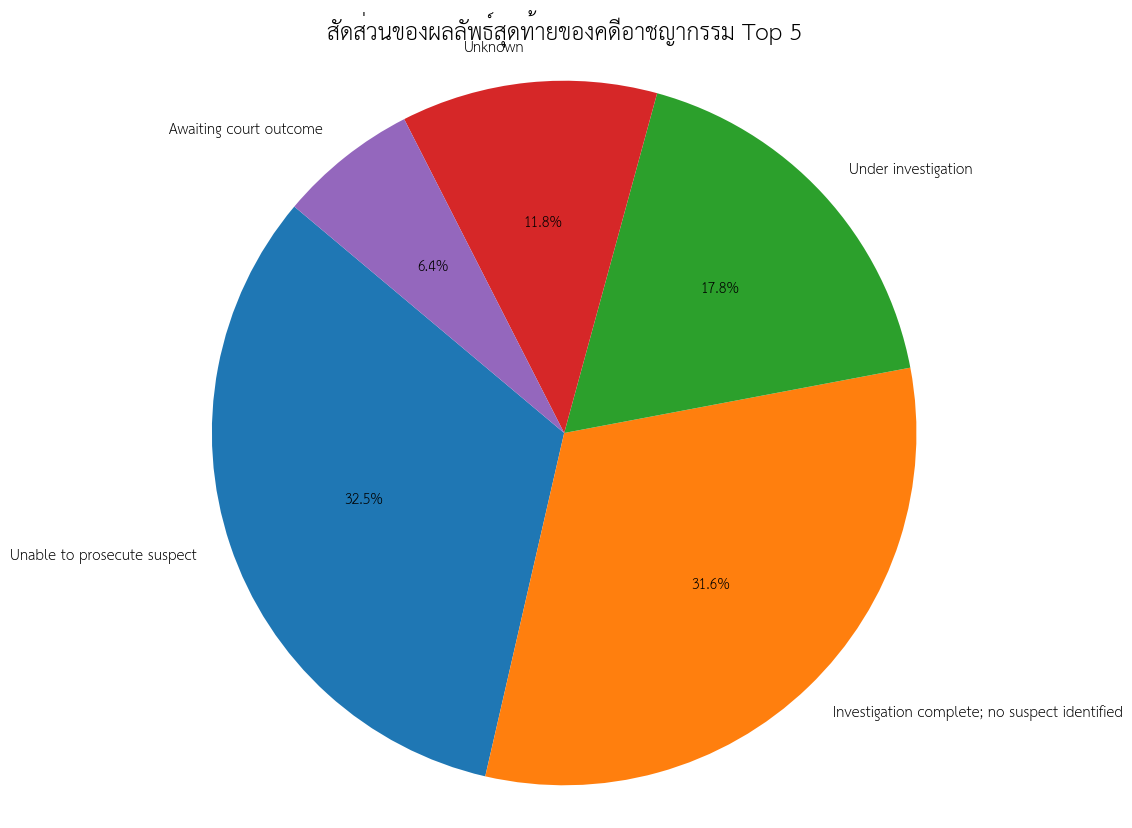

In [168]:
import matplotlib.pyplot as plt

# Calculate the value counts for each Last outcome category
outcome_category_counts = combined_street_2025_all_months['Last outcome category'].value_counts()

# Select the top 5 outcome categories
top_5_outcomes = outcome_category_counts.head(5)

# Create the pie chart
plt.figure(figsize=(10, 10)) # Increased figure size
plt.pie(
    top_5_outcomes, # Use the top 5 data
    labels=top_5_outcomes.index, # Use labels from the top 5
    autopct='%1.1f%%',  # Show percentages with one decimal place
    startangle=140,     # Start the first slice at 140 degrees
    textprops={'fontsize': 10} # Adjusted text size
)

plt.title('สัดส่วนของผลลัพธ์สุดท้ายของคดีอาชญากรรม Top 5', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#นำข้อมูลออกไปยัง Google sheets

In [169]:
# ============================================================
# 🚀 Upload large DataFrames to separate Google Sheets (downsize + batch)
# ============================================================

!pip install gspread gspread_dataframe --quiet
from google.colab import auth
auth.authenticate_user()

import gspread
import pandas as pd
from google.auth import default
from gspread_dataframe import set_with_dataframe
import math

# ============================================================
# ✅ เชื่อมต่อ Google Sheets
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
# ============================================================
# ✅ กำหนดชื่อไฟล์และ DataFrame ที่จะอัปโหลด
sheets_info = {
    "combined_outcomes_2025_all_months":combined_outcomes_2025_all_months,
    "outcomes_transitions_with_force":outcomes_transitions_with_force,
    "stop_and_search_clean":stop_and_search_clean,
    "street":street
    }
# ============================================================
# ✅ ตั้งค่า batch size (จำนวนแถวต่อครั้ง)
BATCH_SIZE = 50000

# ============================================================
# ฟังก์ชันลดขนาด DataFrame
def downsize_df(df):
    # ลด int64 → int32
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = df[col].astype('int32')
    # ลด float64 → float32
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = df[col].astype('float32')
    # แปลง datetime → string
    for col in df.select_dtypes(include=['datetime', 'datetimetz']).columns:
        df[col] = df[col].astype(str)
    return df

# ============================================================
# อัปโหลดทีละ DataFrame
for sheet_title, df in sheets_info.items():
    print(f"\n📤 กำลังอัปโหลด '{sheet_title}'...")

    df = downsize_df(df)  # ลดขนาดข้อมูล
    total_rows = df.shape[0]
    num_batches = math.ceil(total_rows / BATCH_SIZE)

    # สร้าง Google Sheet ใหม่
    sh = gc.create(sheet_title)
    sh.share(None, perm_type='anyone', role='writer')  # ใครก็เข้าดูได้
    ws = sh.sheet1

    print(f"ℹ️ Total rows: {total_rows}, will upload in {num_batches} batches of {BATCH_SIZE}")

    # อัปโหลด batch แรก พร้อม header
    batch = df.iloc[0:min(BATCH_SIZE, total_rows)]
    set_with_dataframe(ws, batch, include_index=False, include_column_header=True)

    # อัปโหลด batch ถัดไป (ถ้ามี)
    for i in range(1, num_batches):
        start_row = i * BATCH_SIZE
        end_row = min((i+1)*BATCH_SIZE, total_rows)
        batch = df.iloc[start_row:end_row]
        set_with_dataframe(ws, batch, include_index=False, include_column_header=False, row=start_row+1)
        print(f"⏳ Uploaded rows {start_row} to {end_row}")

    print(f"✅ Upload finished: '{sheet_title}' ({df.shape[0]} rows, {df.shape[1]} cols)")
    print(f"🔗 Google Sheets URL: https://docs.google.com/spreadsheets/d/{sh.id}")

print("\n🎉 อัปโหลดครบทุกชุดข้อมูลเรียบร้อยแล้ว!")
